In [1]:
import hydra

cfg = None
with hydra.initialize(config_path='.'):
    cfg = hydra.compose('config.yaml',
                    return_hydra_config=True,
                    overrides=["task='d3il-sorting'", 
                               "checkpoint='/juno/u/bsud2/multi_task_experts/tdmpc2/tdmpc2/logs/d3il-sorting/mpc_disabled_checkpoint_100000.pt'",
                              "model_size=48",
                              "mpc=False"])

/tmp/user/23174/ipykernel_3538900/1814050479.py:4: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with hydra.initialize(config_path='.'):


In [2]:
from common.parser import parse_cfg
from envs import make_env
cfg = parse_cfg(cfg)
env = make_env(cfg)

pybullet build time: Nov 28 2023 23:52:03


Final IK error (74 iterations):  7.243842674661373e-06
Final IK error (0 iterations):  7.243842674661373e-06


In [3]:
# Load agent
from tdmpc2 import TDMPC2
import os

agent = TDMPC2(cfg)
assert os.path.exists(cfg.checkpoint), f'Checkpoint {cfg.checkpoint} not found! Must be a valid filepath.'
agent.load(cfg.checkpoint)

In [4]:
def normalize_obs(obs_min_val, obs_max_val, obs):
    normalized_obs = ((obs - obs_min_val)/(obs_max_val - obs_min_val)) * 2 - 1
    return normalized_obs

def normalize_action(action_min_val, action_max_val, action):
    normalized_action = ((action - action_min_val)/(action_max_val - action_min_val)) * 2 - 1
    return normalized_action

def unnormalize_obs(obs_min_val, obs_max_val, normalized_obs):
    obs = ((normalized_obs + 1)/2) * (obs_max_val - obs_min_val) + obs_min_val
    return obs

def unnormalize_action(action_min_val, action_max_val, normalized_action):
    action = ((normalized_action + 1)/2) * (action_max_val - action_min_val) + action_min_val
    return action

tensor([-1.4131e-05,  2.7469e-03])
action min val  tensor([-0.0083, -0.0083])
action max val  tensor([0.0083, 0.0083])
obs min val  tensor([ 2.5433e-01, -3.0691e-01,  2.4908e-01, -3.0284e-01,  2.6673e-01,
        -1.7728e-01, -1.6331e+16, -4.5175e+01, -1.6331e+16,  3.3686e-01,
        -1.5431e-01, -1.9789e+15, -1.2646e+00, -1.6331e+16])
obs max val  tensor([7.6042e-01, 2.6704e-01, 7.6438e-01, 2.9732e-01, 6.9333e-01, 3.3696e-01,
        6.2184e+15, 4.0205e+00, 1.6331e+16, 7.2717e-01, 3.4392e-01, 2.6119e+15,
        4.3439e+01, 1.6331e+16])


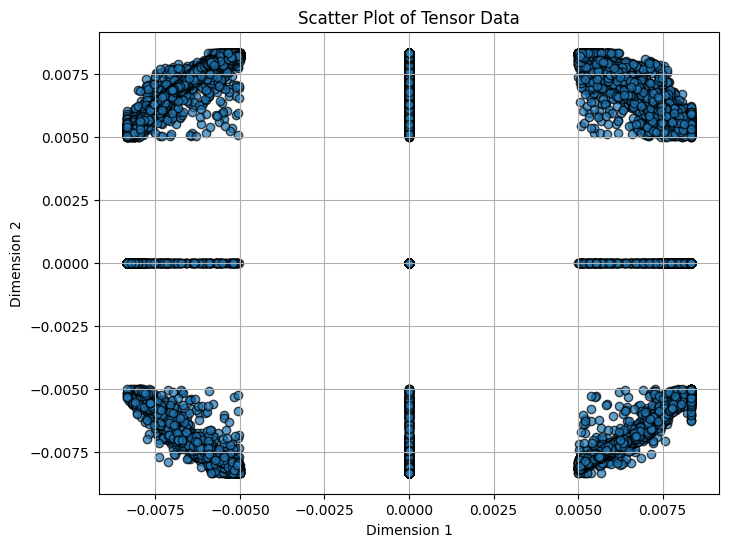

new mean  tensor([-0.0017,  0.3296])


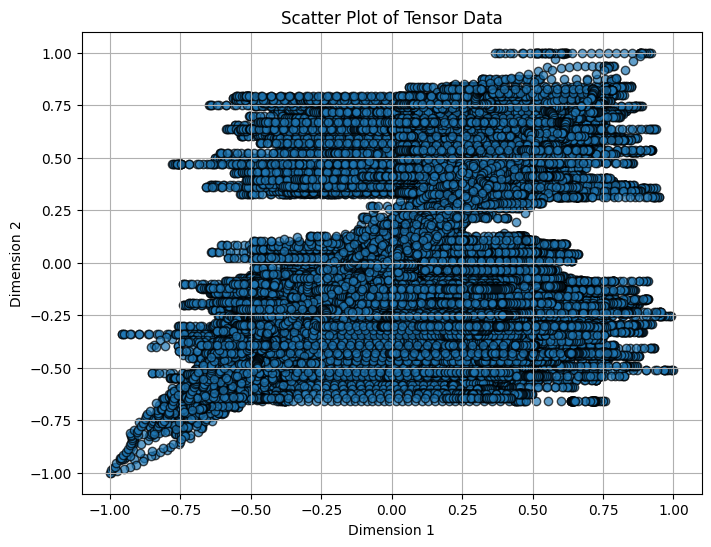

In [21]:
import torch
from pathlib import Path
from glob import glob

fp = Path(os.path.join(cfg.data_dir, 'd3il_sorting.pt'))
td = torch.load(fp, weights_only=False)
obs_min_val, _ = torch.min(td["fields"]["obs"], dim=0)
obs_max_val, _ = torch.max(td["fields"]["obs"], dim=0)
action_min_val, _ = torch.min(td["fields"]["action"], dim=0)
action_max_val, _ = torch.max(td["fields"]["action"], dim=0)
print(torch.mean(td["fields"]["action"], dim=0))
print("action min val ", action_min_val)
print("action max val ", action_max_val)
print("obs min val ", obs_min_val)
print("obs max val ", obs_max_val)
plt.figure(figsize=(8, 6))
plt.scatter(td["fields"]["action"][:, 0], td["fields"]["action"][:, 1], alpha=0.7, edgecolor='k')
plt.title('Scatter Plot of Tensor Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()
td["fields"]["obs"] = normalize_obs(obs_min_val, obs_max_val, td["fields"]["obs"])
td["fields"]["action"] = normalize_action(action_min_val, action_max_val, td["fields"]["action"])
print("new mean ", torch.mean(td["fields"]["action"], dim=0))
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(td["fields"]["obs"][:, 2], td["fields"]["obs"][:, 4], alpha=0.7, edgecolor='k')
plt.title('Scatter Plot of Tensor Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

env: MUJOCO_GL=egl
env: MUJOCO_GL_DEBUG=1


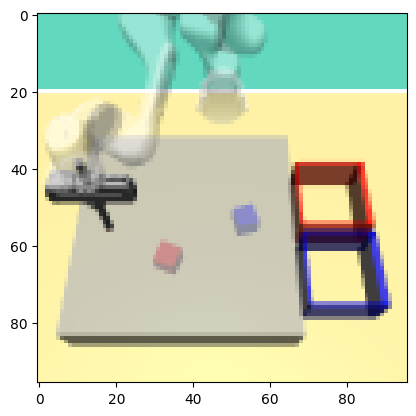

original obs  tensor([ 5.2496e-01, -2.9929e-01,  5.2496e-01, -2.9929e-01,  5.8071e-01,
        -1.4791e-01, -1.7685e-06,  2.6708e-06, -4.1218e-01,  4.6239e-01,
         6.6203e-02, -2.3965e-06,  1.3488e-06, -3.5830e+00])
obs  tensor([ 0.0695, -0.9734,  0.0708, -0.9882,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


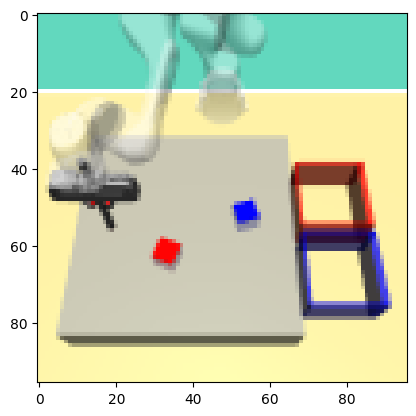

original obs  tensor([ 5.1663e-01, -2.9096e-01,  5.2496e-01, -2.9929e-01,  5.8071e-01,
        -1.4791e-01, -1.7685e-06,  2.6708e-06, -4.1218e-01,  4.6239e-01,
         6.6203e-02, -2.3965e-06,  1.3488e-06, -3.5830e+00])
obs  tensor([ 0.0366, -0.9444,  0.0708, -0.9882,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


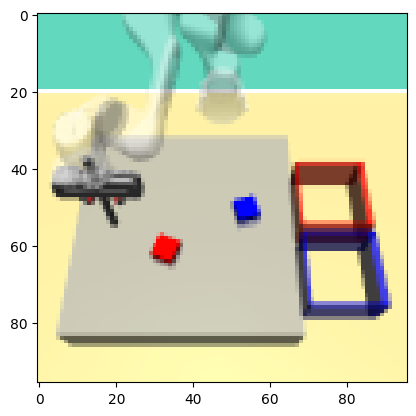

original obs  tensor([ 5.0830e-01, -2.8263e-01,  5.2067e-01, -2.9465e-01,  5.8071e-01,
        -1.4791e-01, -1.2985e-05,  1.9609e-05, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.7595e-05,  9.9029e-06, -3.5830e+00])
obs  tensor([ 0.0036, -0.9154,  0.0541, -0.9727,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.0259,  1.0000])
true action  tensor([-0.0002,  0.0083])
action type  delta


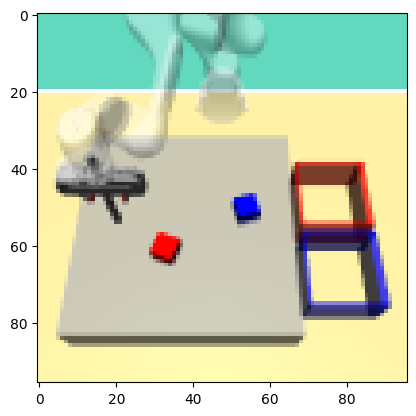

original obs  tensor([ 5.0808e-01, -2.7429e-01,  5.1096e-01, -2.8788e-01,  5.8071e-01,
        -1.4791e-01, -8.2729e-06,  1.2494e-05, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.1210e-05,  6.3093e-06, -3.5830e+00])
obs  tensor([ 0.0028, -0.8863,  0.0164, -0.9502,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


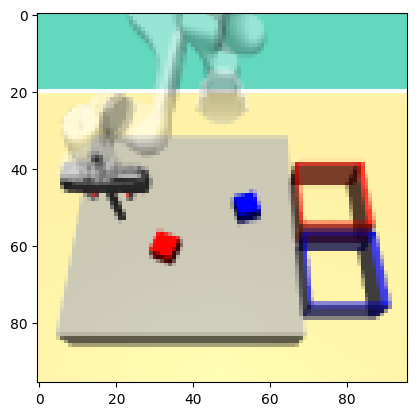

original obs  tensor([ 4.9975e-01, -2.6596e-01,  5.0277e-01, -2.8073e-01,  5.8071e-01,
        -1.4791e-01, -5.0202e-06,  7.5815e-06, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -6.8027e-06,  3.8287e-06, -3.5830e+00])
obs  tensor([-0.0301, -0.8573, -0.0154, -0.9263,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


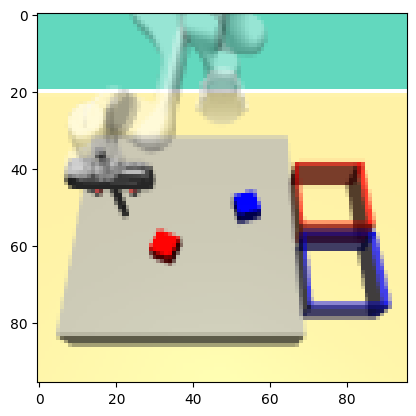

original obs  tensor([ 4.9141e-01, -2.5763e-01,  4.9402e-01, -2.7263e-01,  5.8071e-01,
        -1.4791e-01, -3.0385e-06,  4.5888e-06, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -4.1174e-06,  2.3174e-06, -3.5830e+00])
obs  tensor([-0.0631, -0.8282, -0.0493, -0.8993,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


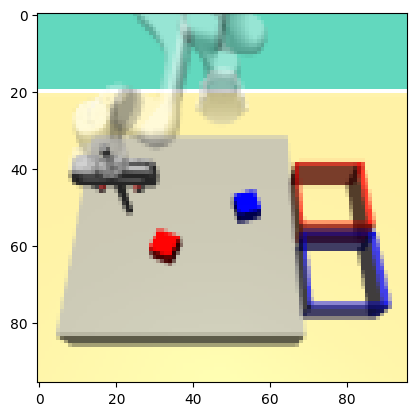

original obs  tensor([ 4.8308e-01, -2.4929e-01,  4.8431e-01, -2.6351e-01,  5.8071e-01,
        -1.4791e-01, -1.8388e-06,  2.7769e-06, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -2.4917e-06,  1.4024e-06, -3.5830e+00])
obs  tensor([-0.0960, -0.7992, -0.0870, -0.8690,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


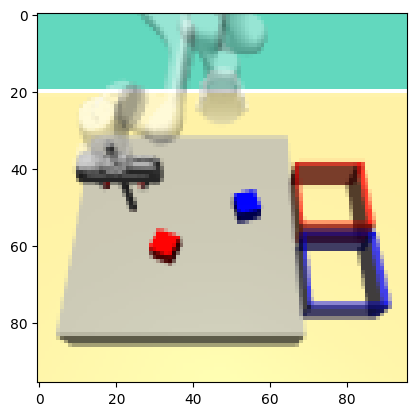

original obs  tensor([ 4.7475e-01, -2.4096e-01,  4.7439e-01, -2.5382e-01,  5.8071e-01,
        -1.4791e-01, -1.1127e-06,  1.6804e-06, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.5078e-06,  8.4860e-07, -3.5830e+00])
obs  tensor([-0.1289, -0.7702, -0.1255, -0.8367,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


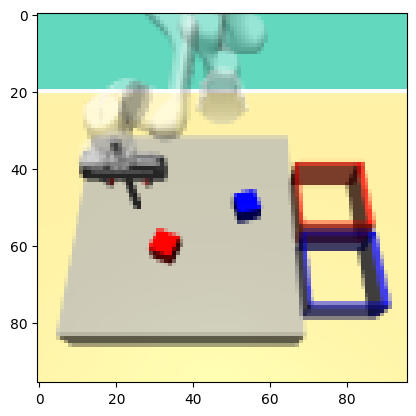

original obs  tensor([ 4.6641e-01, -2.3263e-01,  4.6477e-01, -2.4391e-01,  5.8071e-01,
        -1.4791e-01, -6.7328e-07,  1.0168e-06, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -9.1233e-07,  5.1348e-07, -3.5830e+00])
obs  tensor([-0.1619, -0.7411, -0.1629, -0.8036,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


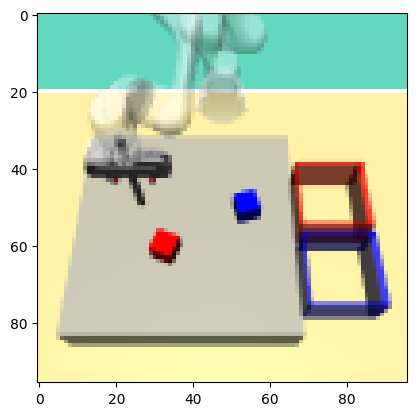

original obs  tensor([ 4.5808e-01, -2.2429e-01,  4.5568e-01, -2.3400e-01,  5.8071e-01,
        -1.4791e-01, -4.0696e-07,  6.1458e-07, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -5.5145e-07,  3.1037e-07, -3.5830e+00])
obs  tensor([-0.1948, -0.7121, -0.1982, -0.7706,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


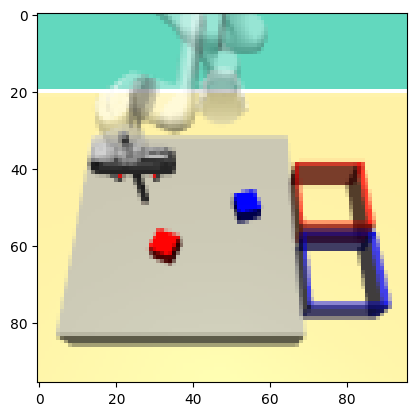

original obs  tensor([ 4.4974e-01, -2.1596e-01,  4.4715e-01, -2.2420e-01,  5.8071e-01,
        -1.4791e-01, -2.3701e-07,  3.5792e-07, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -3.2116e-07,  1.8075e-07, -3.5830e+00])
obs  tensor([-0.2278, -0.6831, -0.2313, -0.7380,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


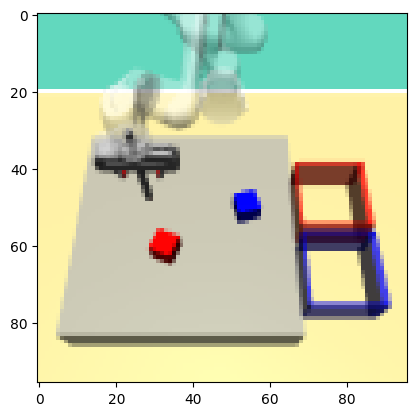

original obs  tensor([ 4.4141e-01, -2.0763e-01,  4.3911e-01, -2.1456e-01,  5.8071e-01,
        -1.4791e-01, -1.3410e-07,  2.0251e-07, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.8171e-07,  1.0227e-07, -3.5830e+00])
obs  tensor([-0.2607, -0.6540, -0.2625, -0.7058,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


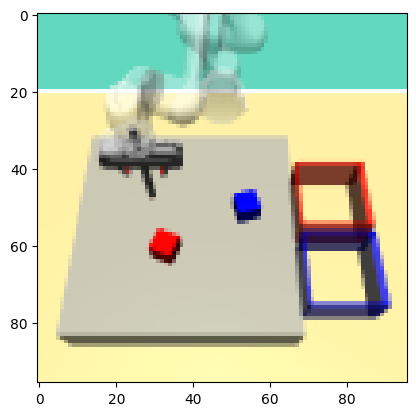

original obs  tensor([ 4.3308e-01, -1.9929e-01,  4.3142e-01, -2.0508e-01,  5.8071e-01,
        -1.4791e-01, -7.7951e-08,  1.1772e-07, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.0563e-07,  5.9449e-08, -3.5830e+00])
obs  tensor([-0.2936, -0.6250, -0.2923, -0.6742,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


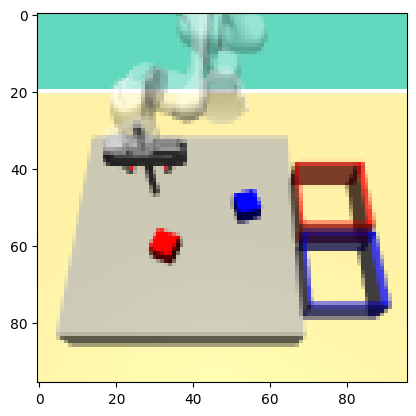

original obs  tensor([ 4.2474e-01, -1.9096e-01,  4.2386e-01, -1.9581e-01,  5.8071e-01,
        -1.4791e-01, -4.6409e-08,  7.0086e-08, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -6.2887e-08,  3.5394e-08, -3.5830e+00])
obs  tensor([-0.3266, -0.5959, -0.3217, -0.6433,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


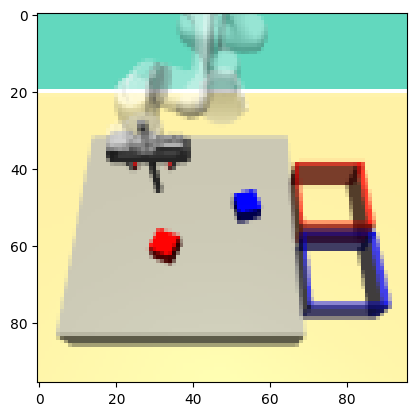

original obs  tensor([ 4.1641e-01, -1.8263e-01,  4.1627e-01, -1.8686e-01,  5.8071e-01,
        -1.4791e-01, -2.7995e-08,  4.2277e-08, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -3.7935e-08,  2.1350e-08, -3.5830e+00])
obs  tensor([-0.3595, -0.5669, -0.3511, -0.6135,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


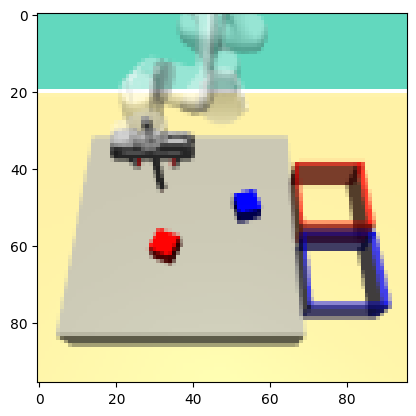

original obs  tensor([ 4.0808e-01, -1.7429e-01,  4.0873e-01, -1.7812e-01,  5.8071e-01,
        -1.4791e-01, -1.7009e-08,  2.5687e-08, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -2.3048e-08,  1.2972e-08, -3.5830e+00])
obs  tensor([-0.3924, -0.5379, -0.3804, -0.5844,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


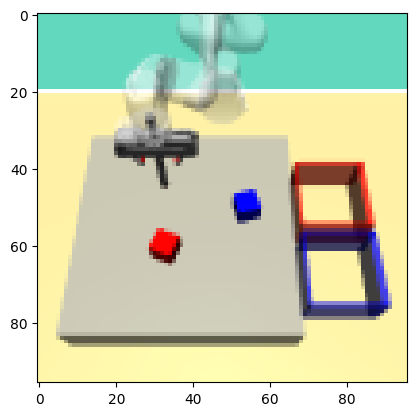

original obs  tensor([ 3.9974e-01, -1.6596e-01,  4.0117e-01, -1.6957e-01,  5.8071e-01,
        -1.4791e-01, -1.0377e-08,  1.5671e-08, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.4062e-08,  7.9141e-09, -3.5830e+00])
obs  tensor([-0.4254, -0.5088, -0.4097, -0.5559,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


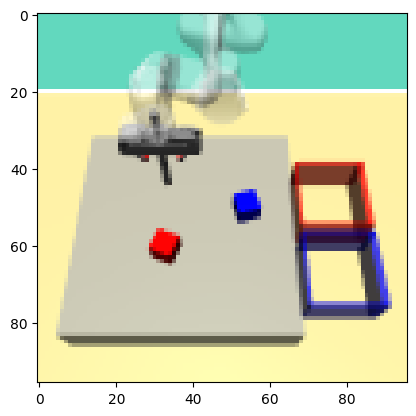

original obs  tensor([ 3.9141e-01, -1.5763e-01,  3.9354e-01, -1.6120e-01,  5.8071e-01,
        -1.4791e-01, -6.3462e-09,  9.5839e-09, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -8.5994e-09,  4.8399e-09, -3.5830e+00])
obs  tensor([-0.4583, -0.4798, -0.4393, -0.5280,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


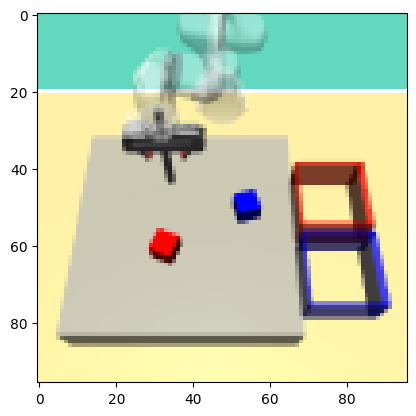

original obs  tensor([ 3.8308e-01, -1.4929e-01,  3.8579e-01, -1.5299e-01,  5.8071e-01,
        -1.4791e-01, -3.8866e-09,  5.8695e-09, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -5.2666e-09,  2.9641e-09, -3.5830e+00])
obs  tensor([-0.4912, -0.4507, -0.4694, -0.5007,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


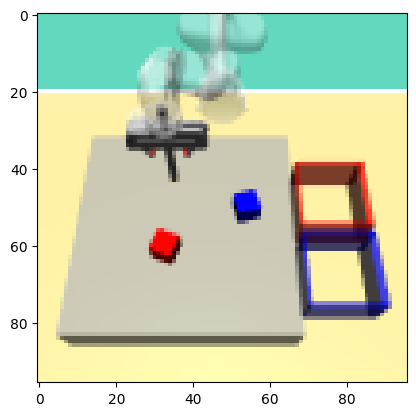

original obs  tensor([ 3.7474e-01, -1.4096e-01,  3.7791e-01, -1.4489e-01,  5.8071e-01,
        -1.4791e-01, -2.3823e-09,  3.5978e-09, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -3.2282e-09,  1.8169e-09, -3.5830e+00])
obs  tensor([-0.5242, -0.4217, -0.5000, -0.4736,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


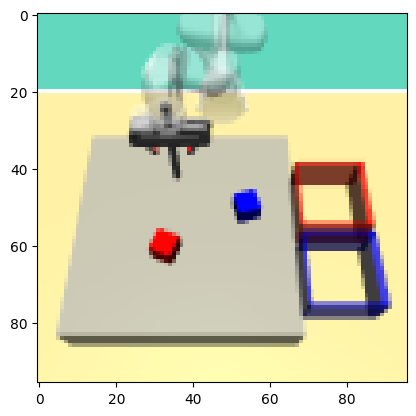

original obs  tensor([ 3.6641e-01, -1.3263e-01,  3.6992e-01, -1.3681e-01,  5.8071e-01,
        -1.4791e-01, -1.4611e-09,  2.2065e-09, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.9798e-09,  1.1143e-09, -3.5830e+00])
obs  tensor([-0.5571, -0.3927, -0.5310, -0.4467,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


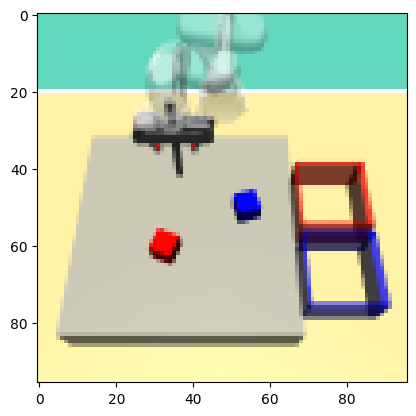

original obs  tensor([ 3.5808e-01, -1.2429e-01,  3.6175e-01, -1.2882e-01,  5.8071e-01,
        -1.4791e-01, -8.9632e-10,  1.3536e-09, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.2146e-09,  6.8358e-10, -3.5830e+00])
obs  tensor([-0.5900, -0.3636, -0.5627, -0.4201,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


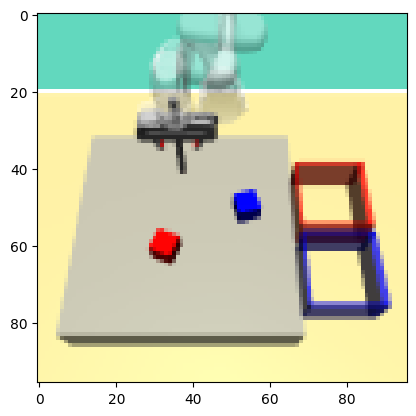

original obs  tensor([ 3.4974e-01, -1.1596e-01,  3.5342e-01, -1.2085e-01,  5.8071e-01,
        -1.4791e-01, -5.4998e-10,  8.3057e-10, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -7.4525e-10,  4.1945e-10, -3.5830e+00])
obs  tensor([-0.6230, -0.3346, -0.5950, -0.3936,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


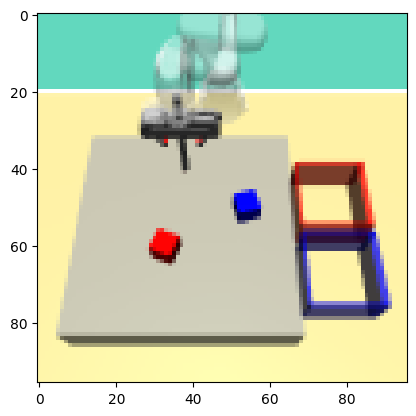

original obs  tensor([ 3.4141e-01, -1.0763e-01,  3.4499e-01, -1.1289e-01,  5.8071e-01,
        -1.4791e-01, -3.3751e-10,  5.0970e-10, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -4.5734e-10,  2.5740e-10, -3.5830e+00])
obs  tensor([-0.6559, -0.3056, -0.6278, -0.3670,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


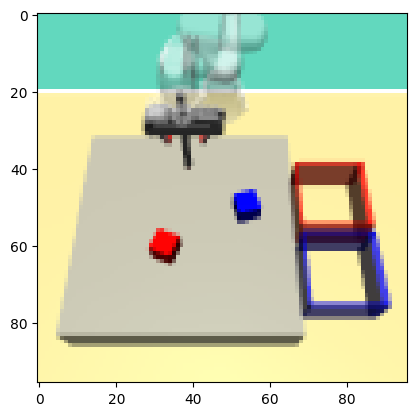

original obs  tensor([ 3.3307e-01, -9.9292e-02,  3.3647e-01, -1.0489e-01,  5.8071e-01,
        -1.4791e-01, -2.0713e-10,  3.1281e-10, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -2.8068e-10,  1.5797e-10, -3.5830e+00])
obs  tensor([-0.6888, -0.2765, -0.6608, -0.3403,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


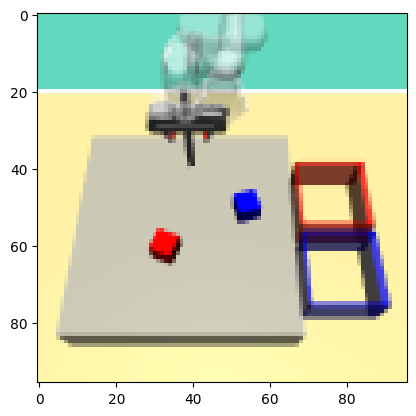

original obs  tensor([ 3.2474e-01, -9.0958e-02,  3.2790e-01, -9.6830e-02,  5.8071e-01,
        -1.4791e-01, -1.2713e-10,  1.9198e-10, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.7226e-10,  9.6953e-11, -3.5830e+00])
obs  tensor([-0.7218, -0.2475, -0.6941, -0.3135,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9990,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


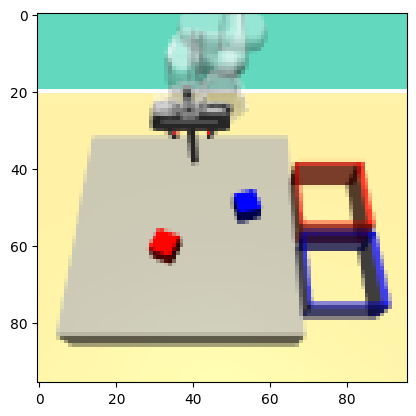

original obs  tensor([ 3.1642e-01, -8.2625e-02,  3.1929e-01, -8.8733e-02,  5.8071e-01,
        -1.4791e-01, -7.8024e-11,  1.1783e-10, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.0573e-10,  5.9506e-11, -3.5830e+00])
obs  tensor([-0.7547, -0.2184, -0.7275, -0.2865,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


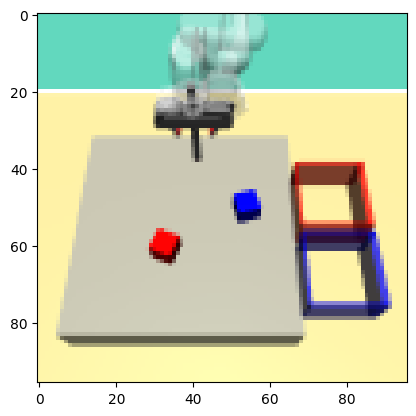

original obs  tensor([ 3.0808e-01, -7.4292e-02,  3.1067e-01, -8.0605e-02,  5.8071e-01,
        -1.4791e-01, -4.7889e-11,  7.2321e-11, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -6.4892e-11,  3.6523e-11, -3.5830e+00])
obs  tensor([-0.7876, -0.1894, -0.7610, -0.2594,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


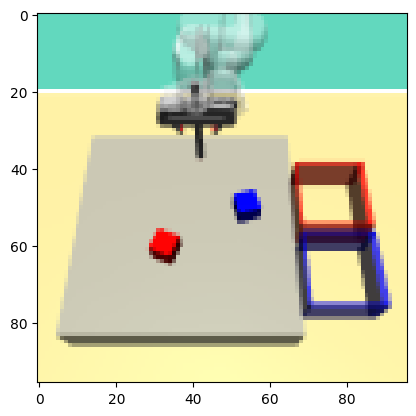

original obs  tensor([ 2.9975e-01, -6.5958e-02,  3.0208e-01, -7.2426e-02,  5.8071e-01,
        -1.4791e-01, -2.9393e-11,  4.4389e-11, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -3.9829e-11,  2.2417e-11, -3.5830e+00])
obs  tensor([-0.8205, -0.1604, -0.7943, -0.2322,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


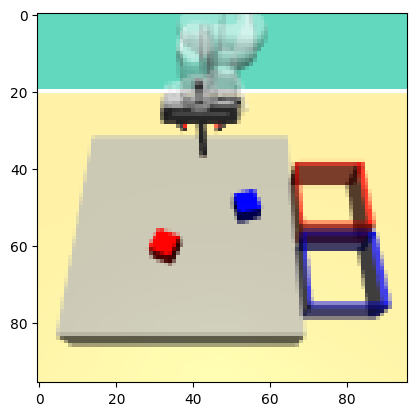

original obs  tensor([ 2.9142e-01, -5.7625e-02,  2.9354e-01, -6.4189e-02,  5.8071e-01,
        -1.4791e-01, -1.8041e-11,  2.7245e-11, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -2.4446e-11,  1.3759e-11, -3.5830e+00])
obs  tensor([-0.8535, -0.1313, -0.8275, -0.2047,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


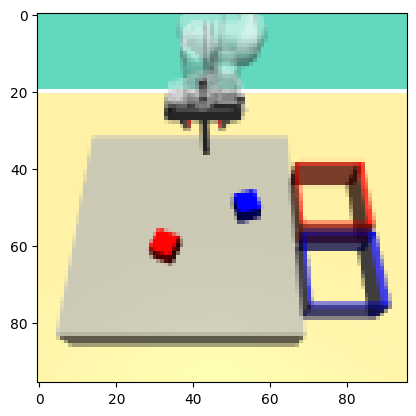

original obs  tensor([ 2.8308e-01, -4.9292e-02,  2.8503e-01, -5.5913e-02,  5.8071e-01,
        -1.4791e-01, -1.1073e-11,  1.6722e-11, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.5005e-11,  8.4449e-12, -3.5830e+00])
obs  tensor([-0.8864, -0.1023, -0.8605, -0.1771,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


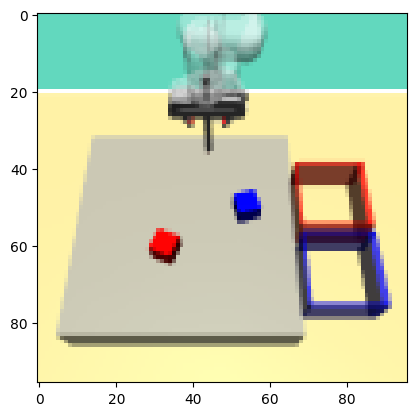

original obs  tensor([ 2.7475e-01, -4.0958e-02,  2.7656e-01, -4.7624e-02,  5.8071e-01,
        -1.4791e-01, -6.7964e-12,  1.0264e-11, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -9.2096e-12,  5.1834e-12, -3.5830e+00])
obs  tensor([-0.9193, -0.0733, -0.8933, -0.1495,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


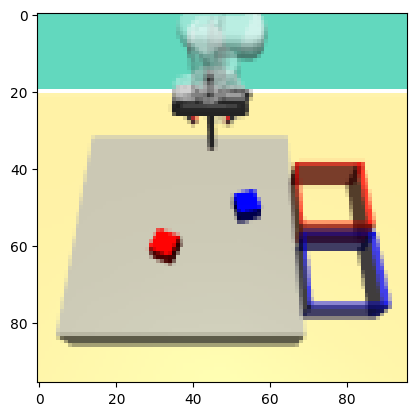

original obs  tensor([ 2.6641e-01, -3.2625e-02,  2.6814e-01, -3.9343e-02,  5.8071e-01,
        -1.4791e-01, -4.1715e-12,  6.2998e-12, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -5.6526e-12,  3.1815e-12, -3.5830e+00])
obs  tensor([-0.9523, -0.0442, -0.9260, -0.1219,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9957,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


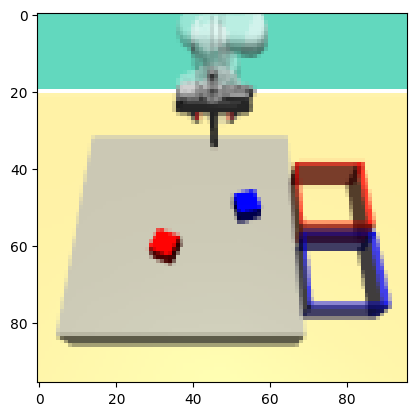

original obs  tensor([ 2.5812e-01, -2.4292e-02,  2.5976e-01, -3.1082e-02,  5.8071e-01,
        -1.4791e-01, -2.5604e-12,  3.8667e-12, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -3.4695e-12,  1.9527e-12, -3.5830e+00])
obs  tensor([-0.9850, -0.0152, -0.9586, -0.0944,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


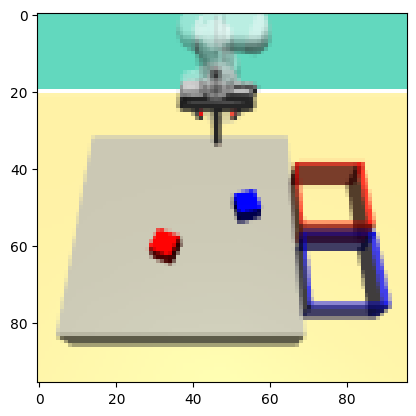

original obs  tensor([ 2.4978e-01, -1.5958e-02,  2.5148e-01, -2.2850e-02,  5.8071e-01,
        -1.4791e-01, -1.5715e-12,  2.3733e-12, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -2.1295e-12,  1.1986e-12, -3.5830e+00])
obs  tensor([-1.0180,  0.0139, -0.9907, -0.0670,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


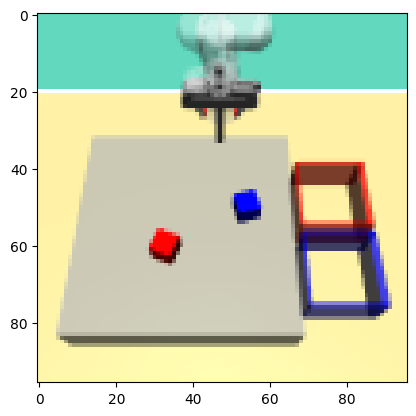

original obs  tensor([ 2.4145e-01, -7.6251e-03,  2.4330e-01, -1.4650e-02,  5.8071e-01,
        -1.4791e-01, -9.6455e-13,  1.4567e-12, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.3071e-12,  7.3566e-13, -3.5830e+00])
obs  tensor([-1.0509,  0.0429, -1.0224, -0.0396,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


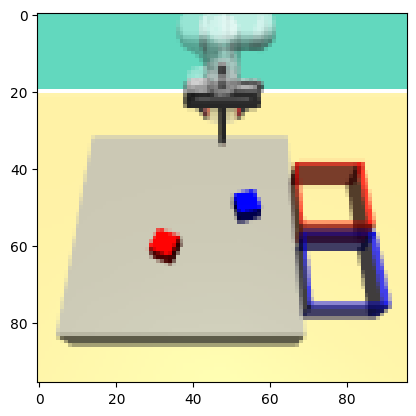

original obs  tensor([ 2.3312e-01,  7.0825e-04,  2.3522e-01, -6.4753e-03,  5.8071e-01,
        -1.4791e-01, -5.9202e-13,  8.9413e-13, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -8.0227e-13,  4.5155e-13, -3.5830e+00])
obs  tensor([-1.0838,  0.0719, -1.0538, -0.0124,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


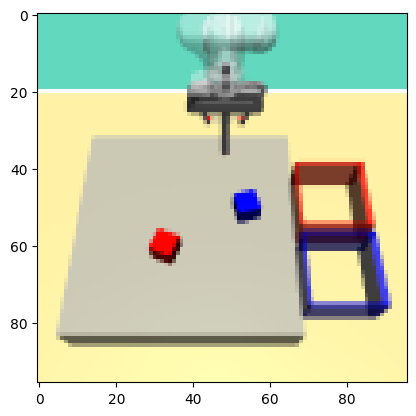

original obs  tensor([ 2.2478e-01,  9.0416e-03,  2.3769e-01,  8.1484e-04,  5.8071e-01,
        -1.4791e-01, -3.6337e-13,  5.4885e-13, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -4.9242e-13,  2.7716e-13, -3.5830e+00])
obs  tensor([-1.1168,  0.1010, -1.0442,  0.0119,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


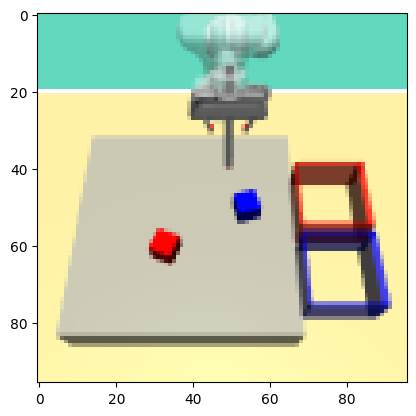

original obs  tensor([ 2.1645e-01,  1.7375e-02,  2.6198e-01,  8.4528e-03,  5.8071e-01,
        -1.4791e-01, -2.2304e-13,  3.3688e-13, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -3.0223e-13,  1.7012e-13, -3.5830e+00])
obs  tensor([-1.1497,  0.1300, -0.9500,  0.0374,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


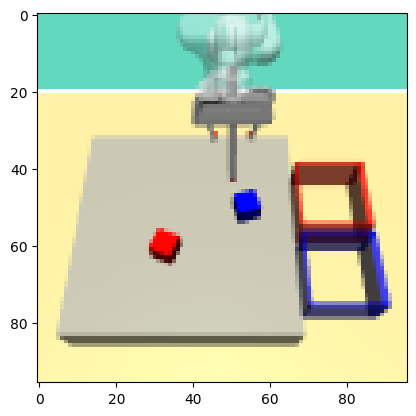

original obs  tensor([ 2.0812e-01,  2.5708e-02,  2.9987e-01,  1.7272e-02,  5.8071e-01,
        -1.4791e-01, -1.3692e-13,  2.0678e-13, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.8551e-13,  1.0442e-13, -3.5830e+00])
obs  tensor([-1.1826,  0.1591, -0.8029,  0.0667,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


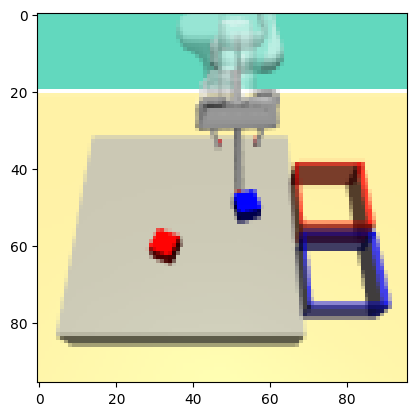

original obs  tensor([ 2.1645e-01,  3.4042e-02,  3.3893e-01,  2.7436e-02,  5.8071e-01,
        -1.4791e-01, -8.4026e-14,  1.2690e-13, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.1385e-13,  6.4077e-14, -3.5830e+00])
obs  tensor([-1.1497,  0.1881, -0.6513,  0.1006,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


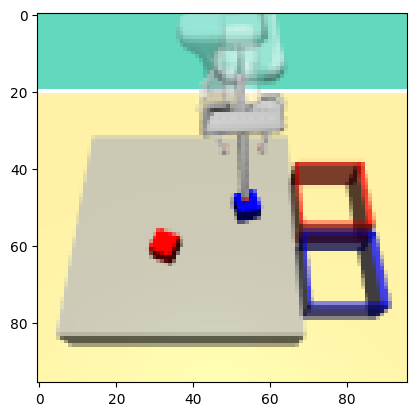

original obs  tensor([ 2.2478e-01,  4.2375e-02,  3.7467e-01,  3.9198e-02,  5.8071e-01,
        -1.4791e-01, -5.1571e-14,  7.7896e-14, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -6.9866e-14,  3.9315e-14, -3.5830e+00])
obs  tensor([-1.1168,  0.2171, -0.5126,  0.1398,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.0858,  1.0000])
true action  tensor([-0.0007,  0.0083])
action type  delta


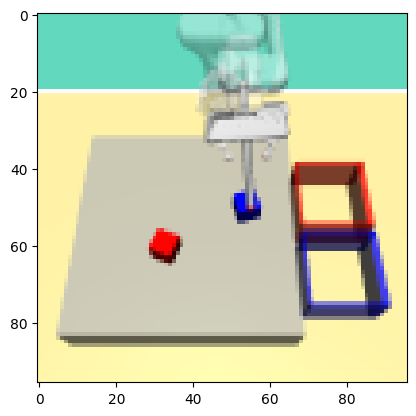

original obs  tensor([ 2.2407e-01,  5.0708e-02,  4.0471e-01,  5.1819e-02,  5.8071e-01,
        -1.4791e-01, -3.1640e-14,  4.7786e-14, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -4.2875e-14,  2.4142e-14, -3.5830e+00])
obs  tensor([-1.1196,  0.2462, -0.3960,  0.1819,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


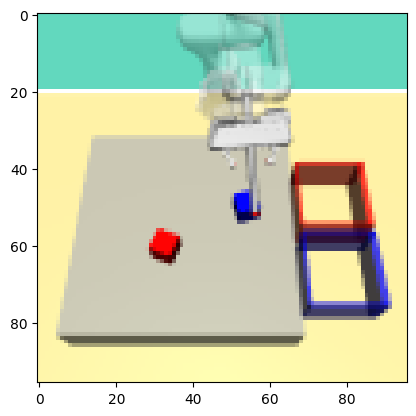

original obs  tensor([ 2.1573e-01,  5.9042e-02,  4.2662e-01,  6.2062e-02,  5.8071e-01,
        -1.4791e-01, -1.9431e-14,  2.9324e-14, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -2.6334e-14,  1.4782e-14, -3.5830e+00])
obs  tensor([-1.1525,  0.2752, -0.3110,  0.2160,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


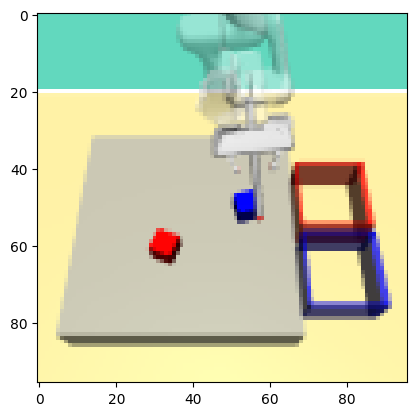

original obs  tensor([ 2.0740e-01,  6.7375e-02,  4.3483e-01,  7.2007e-02,  5.8071e-01,
        -1.4791e-01, -1.1915e-14,  1.7955e-14, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -1.6169e-14,  9.1298e-15, -3.5830e+00])
obs  tensor([-1.1855,  0.3042, -0.2791,  0.2492,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.7451, 1.0000])
true action  tensor([0.0062, 0.0083])
action type  delta


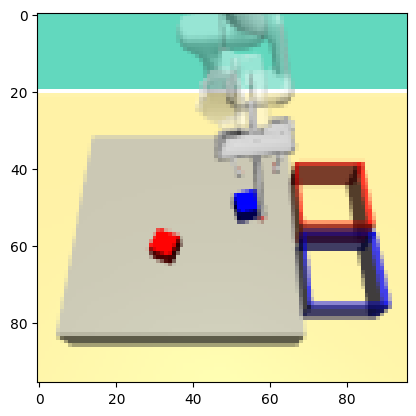

original obs  tensor([ 2.1361e-01,  7.5708e-02,  4.3308e-01,  8.2520e-02,  5.8071e-01,
        -1.4791e-01, -7.3252e-15,  1.1019e-14, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -9.9287e-15,  5.5816e-15, -3.5830e+00])
obs  tensor([-1.1609,  0.3333, -0.2859,  0.2842,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.8860, 1.0000])
true action  tensor([0.0074, 0.0083])
action type  delta


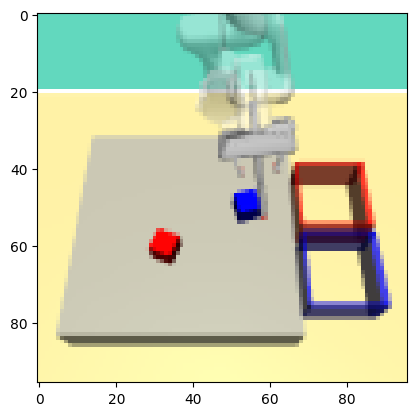

original obs  tensor([ 2.2099e-01,  8.4042e-02,  4.2311e-01,  9.0324e-02,  5.8071e-01,
        -1.4791e-01, -4.4519e-15,  6.7435e-15, -4.1218e-01,  4.6239e-01,
         6.6202e-02, -6.0658e-15,  3.4751e-15, -3.5830e+00])
obs  tensor([-1.1318,  0.3623, -0.3246,  0.3102,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3568, -0.1148, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.0926,  1.0000])
true action  tensor([-0.0008,  0.0083])
action type  delta


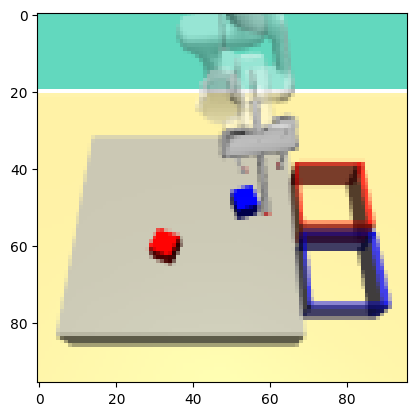

original obs  tensor([ 2.2022e-01,  9.2375e-02,  4.0968e-01,  9.6583e-02,  5.8071e-01,
        -1.4791e-01, -2.7666e-15,  4.1440e-15, -4.1218e-01,  4.6081e-01,
         6.6864e-02, -3.6437e-02,  4.5645e-03, -3.3827e+00])
obs  tensor([-1.1348,  0.3914, -0.3767,  0.3310,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.3649, -0.1122, -0.1379, -0.9432,  0.0000])
mpc  False
original action  tensor([-0.9642,  1.0000])
true action  tensor([-0.0080,  0.0083])
action type  delta


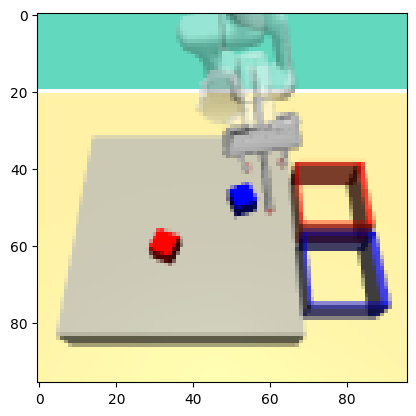

original obs  tensor([ 2.1218e-01,  1.0071e-01,  3.9999e-01,  1.0388e-01,  5.8071e-01,
        -1.4791e-01, -1.7012e-15,  2.5444e-15, -4.1218e-01,  4.5102e-01,
         6.1004e-02,  1.1378e-02,  7.0153e-03, -3.1028e+00])
obs  tensor([-1.1666,  0.4204, -0.4143,  0.3554,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4150, -0.1357, -0.1379, -0.9431,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


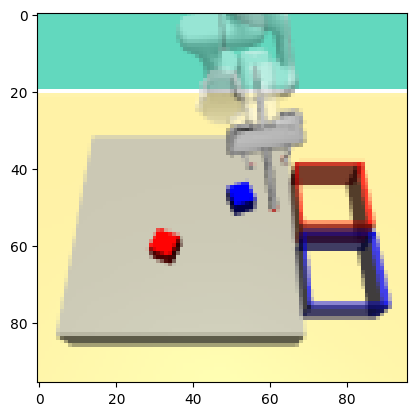

original obs  tensor([ 2.2052e-01,  1.0904e-01,  3.9206e-01,  1.1210e-01,  5.8071e-01,
        -1.4791e-01, -1.0668e-15,  1.5527e-15, -4.1218e-01,  4.4298e-01,
         5.5029e-02, -1.6711e-03,  8.5950e-04, -2.8248e+00])
obs  tensor([-1.1336,  0.4494, -0.4451,  0.3828,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4562, -0.1597, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9919, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


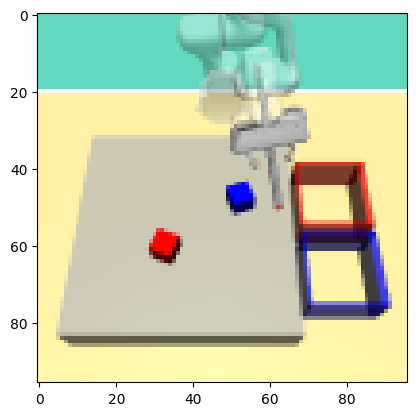

original obs  tensor([ 2.2878e-01,  1.1737e-01,  3.8619e-01,  1.2148e-01,  5.8071e-01,
        -1.4791e-01, -6.5758e-16,  9.4096e-16, -4.1218e-01,  4.3778e-01,
         5.1172e-02,  3.3865e-04,  4.1019e-05, -2.7325e+00])
obs  tensor([-1.1010,  0.4785, -0.4679,  0.4140,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4829, -0.1752, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.4845, 1.0000])
true action  tensor([0.0040, 0.0083])
action type  delta


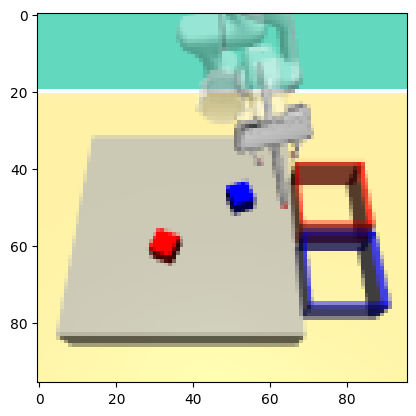

original obs  tensor([ 2.3282e-01,  1.2571e-01,  3.8222e-01,  1.3206e-01,  5.8071e-01,
        -1.4791e-01, -4.0368e-16,  5.7613e-16, -4.1218e-01,  4.3539e-01,
         4.9419e-02,  8.8135e-04,  1.7303e-04, -2.7101e+00])
obs  tensor([-1.0850,  0.5075, -0.4832,  0.4493,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4951, -0.1822, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


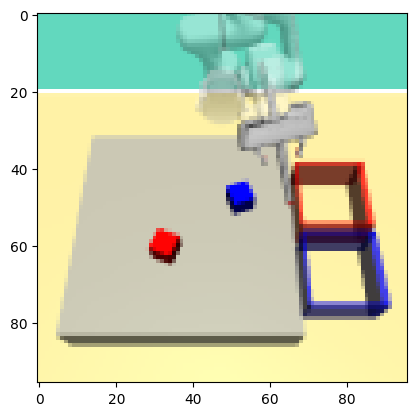

original obs  tensor([ 2.4115e-01,  1.3404e-01,  3.7958e-01,  1.4366e-01,  5.8071e-01,
        -1.4791e-01, -2.4885e-16,  3.5348e-16, -4.1218e-01,  4.3512e-01,
         4.9232e-02, -5.4312e-04, -4.5832e-04, -2.7069e+00])
obs  tensor([-1.0521,  0.5366, -0.4935,  0.4879,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1829, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


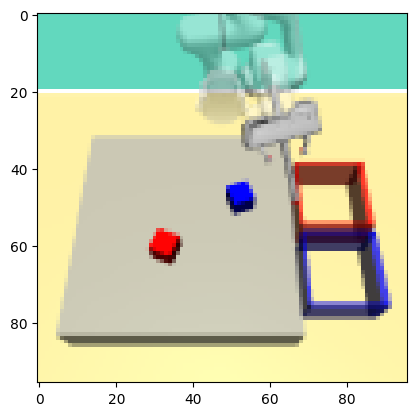

original obs  tensor([ 2.4949e-01,  1.4237e-01,  3.7754e-01,  1.5593e-01,  5.8071e-01,
        -1.4791e-01, -1.8348e-16,  2.0391e-16, -4.1218e-01,  4.3512e-01,
         4.9222e-02, -3.6722e-04, -3.2638e-04, -2.7069e+00])
obs  tensor([-1.0191,  0.5656, -0.5014,  0.5288,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.3794, 1.0000])
true action  tensor([0.0032, 0.0083])
action type  delta


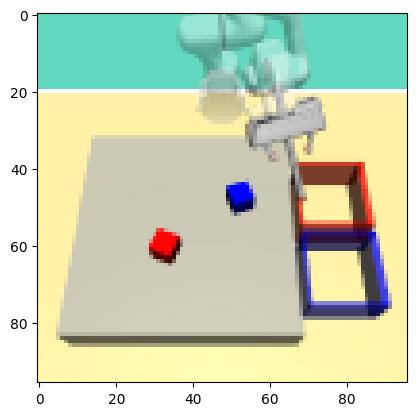

original obs  tensor([ 2.5265e-01,  1.5071e-01,  3.7549e-01,  1.6845e-01,  5.8071e-01,
        -1.4791e-01, -1.2144e-16,  1.2984e-16, -4.1218e-01,  4.3512e-01,
         4.9217e-02, -2.2756e-04, -2.0357e-04, -2.7069e+00])
obs  tensor([-1.0067,  0.5946, -0.5094,  0.5705,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


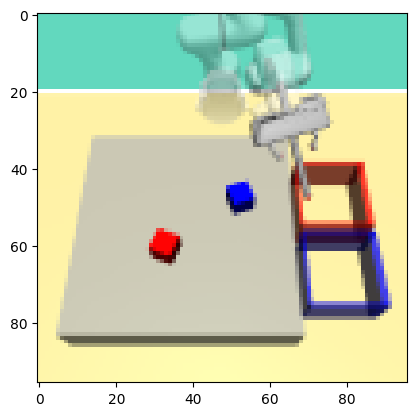

original obs  tensor([ 2.6098e-01,  1.5904e-01,  3.7296e-01,  1.8082e-01,  5.8071e-01,
        -1.4791e-01, -8.3539e-17,  1.0220e-16, -4.1218e-01,  4.3512e-01,
         4.9215e-02, -1.4021e-04, -1.2549e-04, -2.7069e+00])
obs  tensor([-0.9737,  0.6237, -0.5192,  0.6118,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9993,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


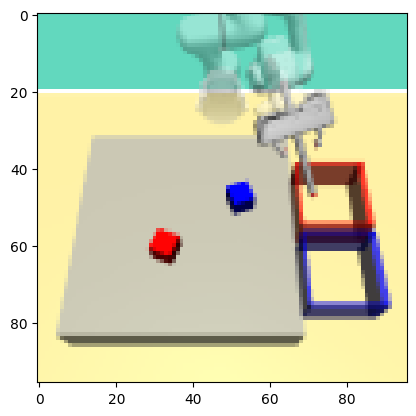

original obs  tensor([ 2.5265e-01,  1.6737e-01,  3.6970e-01,  1.9279e-01,  5.8071e-01,
        -1.4791e-01, -6.1921e-17,  7.8145e-17, -4.1218e-01,  4.3512e-01,
         4.9213e-02, -8.6254e-05, -7.7204e-05, -2.7069e+00])
obs  tensor([-1.0066,  0.6527, -0.5319,  0.6517,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


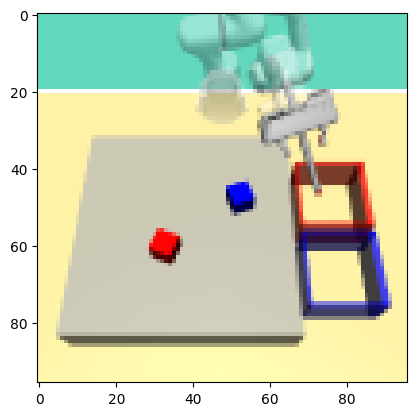

original obs  tensor([ 2.6099e-01,  1.7571e-01,  3.6554e-01,  2.0464e-01,  5.8071e-01,
        -1.4791e-01, -3.7154e-17,  9.8737e-17, -4.1218e-01,  4.3513e-01,
         4.9212e-02, -5.3015e-05, -4.7453e-05, -2.7069e+00])
obs  tensor([-0.9737,  0.6817, -0.5480,  0.6911,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


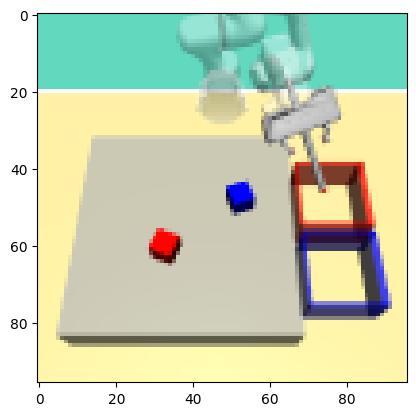

original obs  tensor([ 2.6932e-01,  1.8404e-01,  3.6072e-01,  2.1607e-01,  5.8071e-01,
        -1.4791e-01,  4.3508e-17,  1.0229e-16, -4.1218e-01,  4.3513e-01,
         4.9212e-02, -3.2568e-05, -2.9151e-05, -2.7069e+00])
obs  tensor([-0.9408,  0.7108, -0.5667,  0.7292,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


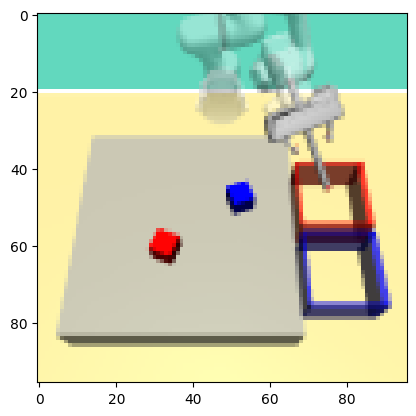

original obs  tensor([ 2.7765e-01,  1.9237e-01,  3.5581e-01,  2.2622e-01,  5.8071e-01,
        -1.4791e-01, -4.7207e-06, -4.1065e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.0000e-05, -1.7902e-05, -2.7069e+00])
obs  tensor([-0.9078,  0.7398, -0.5858,  0.7630,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


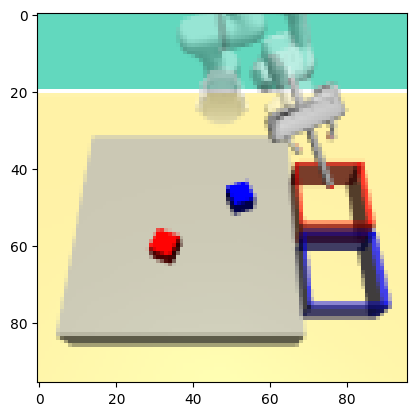

original obs  tensor([ 2.8599e-01,  2.0071e-01,  3.5123e-01,  2.3453e-01,  5.8071e-01,
        -1.4791e-01, -3.2391e-06, -2.8176e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.2280e-05, -1.0991e-05, -2.7069e+00])
obs  tensor([-0.8749,  0.7689, -0.6035,  0.7908,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


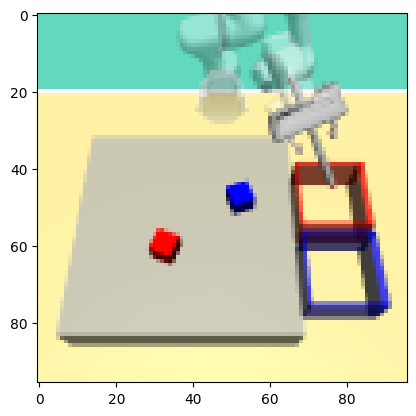

original obs  tensor([ 2.9432e-01,  2.0904e-01,  3.4710e-01,  2.4106e-01,  5.8071e-01,
        -1.4791e-01, -2.0017e-06, -1.7412e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -7.5386e-06, -6.7476e-06, -2.7069e+00])
obs  tensor([-0.8420,  0.7979, -0.6196,  0.8125,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


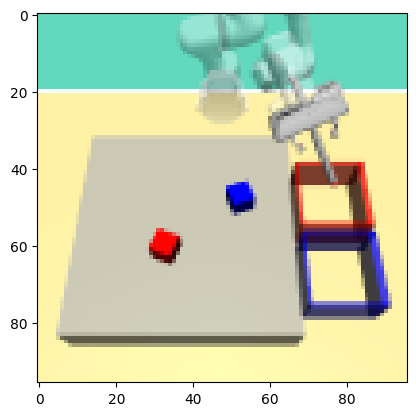

original obs  tensor([ 3.0265e-01,  2.1737e-01,  3.4328e-01,  2.4627e-01,  5.8071e-01,
        -1.4791e-01, -1.2291e-06, -1.0692e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -4.6276e-06, -4.1421e-06, -2.7069e+00])
obs  tensor([-0.8090,  0.8269, -0.6344,  0.8299,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


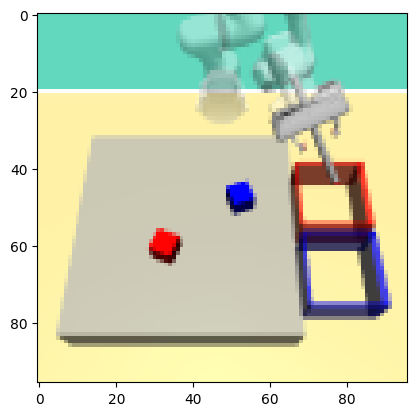

original obs  tensor([ 3.1099e-01,  2.2571e-01,  3.3955e-01,  2.5070e-01,  5.8071e-01,
        -1.4791e-01, -7.5445e-07, -6.5628e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.8406e-06, -2.5425e-06, -2.7069e+00])
obs  tensor([-0.7761,  0.8560, -0.6489,  0.8446,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9586, 1.0000])
true action  tensor([0.0080, 0.0083])
action type  delta


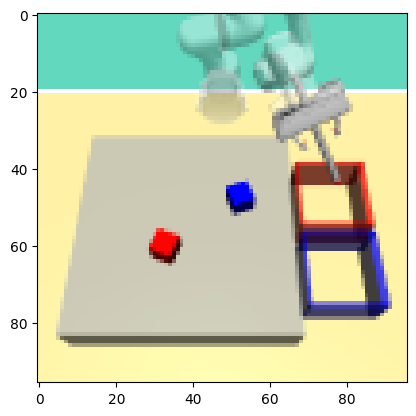

original obs  tensor([ 3.1898e-01,  2.3404e-01,  3.3573e-01,  2.5484e-01,  5.8071e-01,
        -1.4791e-01, -4.6307e-07, -4.0282e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.7436e-06, -1.5606e-06, -2.7069e+00])
obs  tensor([-0.7445,  0.8850, -0.6637,  0.8584,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


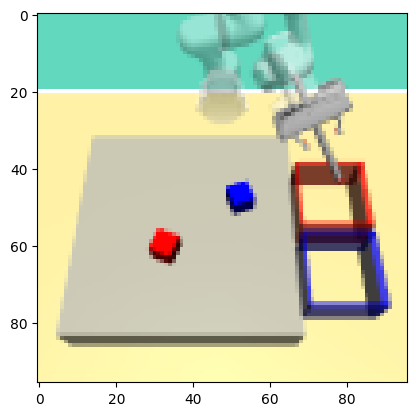

original obs  tensor([ 3.2731e-01,  2.4237e-01,  3.3164e-01,  2.5913e-01,  5.8071e-01,
        -1.4791e-01, -2.8423e-07, -2.4724e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.0702e-06, -9.5792e-07, -2.7069e+00])
obs  tensor([-0.7116,  0.9141, -0.6796,  0.8727,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9994, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


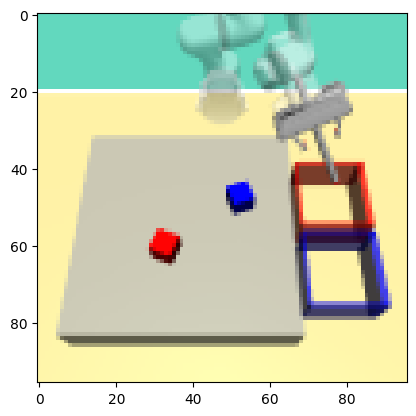

original obs  tensor([ 3.3564e-01,  2.5071e-01,  3.2796e-01,  2.6380e-01,  5.8071e-01,
        -1.4791e-01, -1.7445e-07, -1.5175e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -6.5689e-07, -5.8797e-07, -2.7069e+00])
obs  tensor([-0.6787,  0.9431, -0.6938,  0.8883,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.5591, 1.0000])
true action  tensor([0.0047, 0.0083])
action type  delta


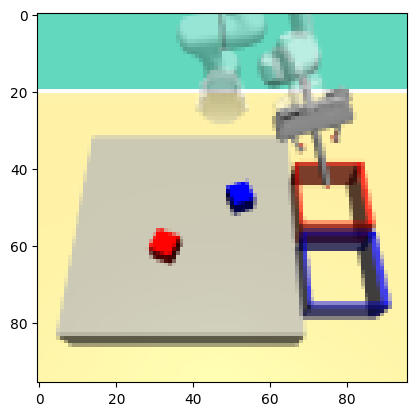

original obs  tensor([ 3.4030e-01,  2.5904e-01,  3.2909e-01,  2.6117e-01,  5.8071e-01,
        -1.4791e-01, -1.0708e-07, -9.3144e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -4.0319e-07, -3.6089e-07, -2.7069e+00])
obs  tensor([-0.6603,  0.9721, -0.6895,  0.8795,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


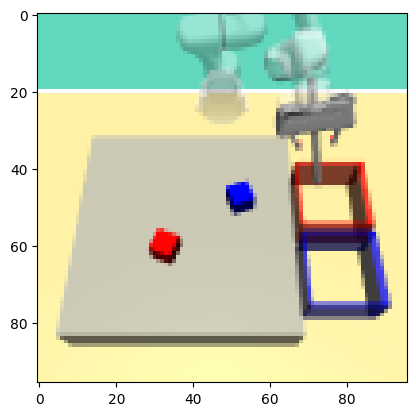

original obs  tensor([ 3.3196e-01,  2.6737e-01,  3.3267e-01,  2.5649e-01,  5.8071e-01,
        -1.4791e-01, -6.5722e-08, -5.7170e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.4747e-07, -2.2151e-07, -2.7069e+00])
obs  tensor([-0.6932,  1.0012, -0.6756,  0.8639,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.8819,  1.0000])
true action  tensor([-0.0073,  0.0083])
action type  delta


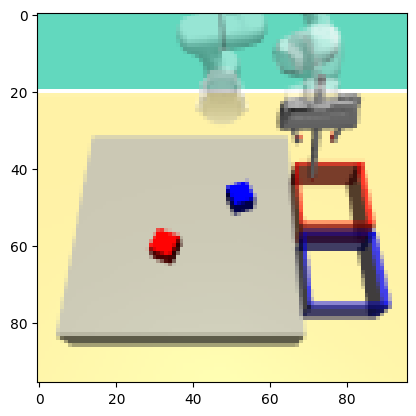

original obs  tensor([ 3.2461e-01,  2.7571e-01,  3.2928e-01,  2.5084e-01,  5.8071e-01,
        -1.4791e-01, -4.0339e-08, -3.5090e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.5190e-07, -1.3596e-07, -2.7069e+00])
obs  tensor([-0.7223,  1.0302, -0.6888,  0.8451,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9810, 1.0000])
true action  tensor([0.0082, 0.0083])
action type  delta


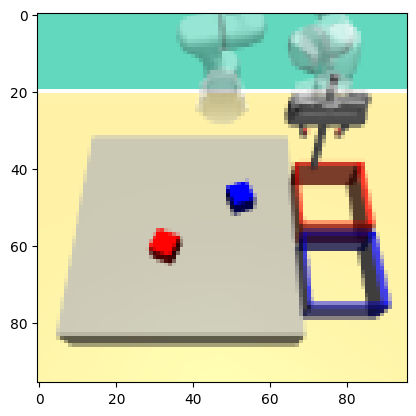

original obs  tensor([ 3.3279e-01,  2.8404e-01,  3.1850e-01,  2.5084e-01,  5.8071e-01,
        -1.4791e-01, -2.4759e-08, -2.1538e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -9.3231e-08, -8.3450e-08, -2.7069e+00])
obs  tensor([-0.6899,  1.0592, -0.7306,  0.8451,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


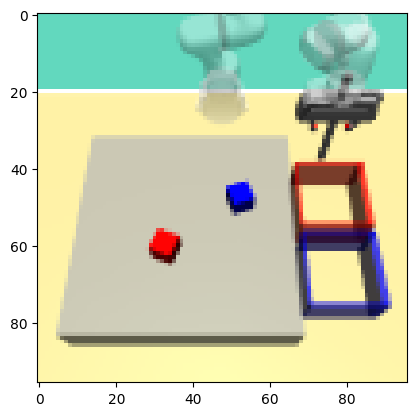

original obs  tensor([ 3.2446e-01,  2.9237e-01,  3.1047e-01,  2.6426e-01,  5.8071e-01,
        -1.4791e-01, -1.5197e-08, -1.3220e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -5.7224e-08, -5.1220e-08, -2.7069e+00])
obs  tensor([-0.7229,  1.0883, -0.7617,  0.8898,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9874,  1.0000])
true action  tensor([-0.0082,  0.0083])
action type  delta


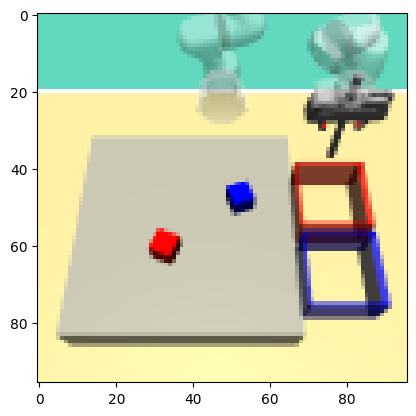

original obs  tensor([ 3.1623e-01,  3.0071e-01,  3.0355e-01,  2.8725e-01,  5.8071e-01,
        -1.4791e-01, -9.3277e-09, -8.1139e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -3.5123e-08, -3.1438e-08, -2.7069e+00])
obs  tensor([-0.7554,  1.1173, -0.7886,  0.9664,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


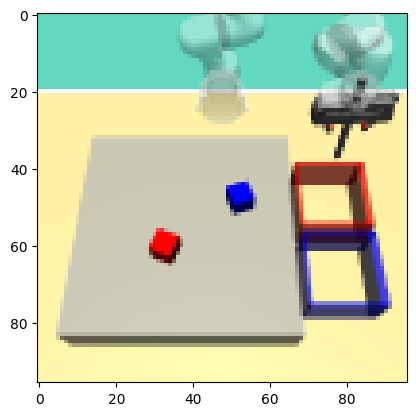

original obs  tensor([ 3.0789e-01,  3.0904e-01,  3.0699e-01,  3.0970e-01,  5.8071e-01,
        -1.4791e-01, -5.7252e-09, -4.9802e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.1558e-08, -1.9296e-08, -2.7069e+00])
obs  tensor([-0.7883,  1.1464, -0.7752,  1.0413,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


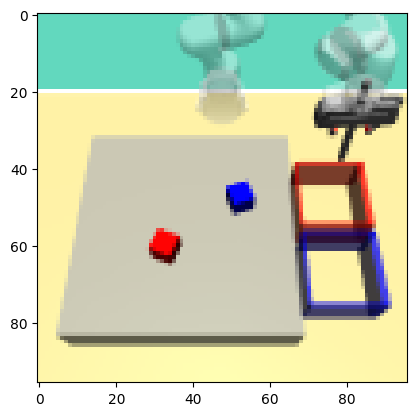

original obs  tensor([ 3.1623e-01,  3.1737e-01,  3.1173e-01,  3.2496e-01,  5.8071e-01,
        -1.4791e-01, -3.5140e-09, -3.0568e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.3232e-08, -1.1844e-08, -2.7069e+00])
obs  tensor([-0.7554,  1.1754, -0.7569,  1.0921,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9993, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


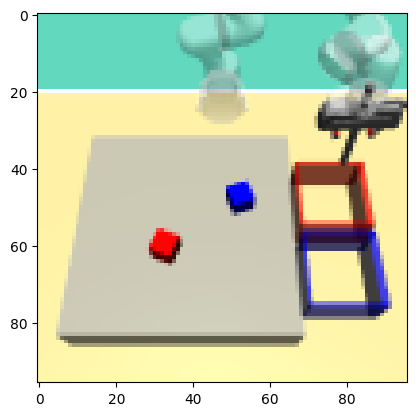

original obs  tensor([ 3.2455e-01,  3.2571e-01,  3.1935e-01,  3.3490e-01,  5.8071e-01,
        -1.4791e-01, -2.1568e-09, -1.8762e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -8.1216e-09, -7.2695e-09, -2.7069e+00])
obs  tensor([-0.7225,  1.2044, -0.7273,  1.1252,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9628,  1.0000])
true action  tensor([-0.0080,  0.0083])
action type  delta


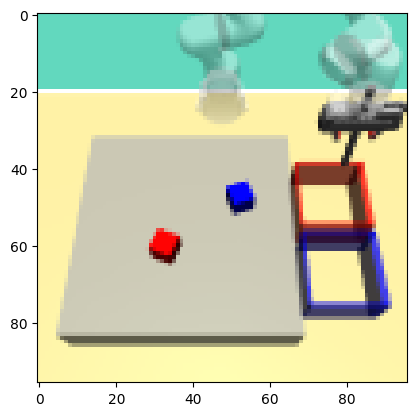

original obs  tensor([ 3.1653e-01,  3.3404e-01,  3.2727e-01,  3.4243e-01,  5.8071e-01,
        -1.4791e-01, -1.3238e-09, -1.1516e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -4.9849e-09, -4.4619e-09, -2.7069e+00])
obs  tensor([-0.7542,  1.2335, -0.6965,  1.1503,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


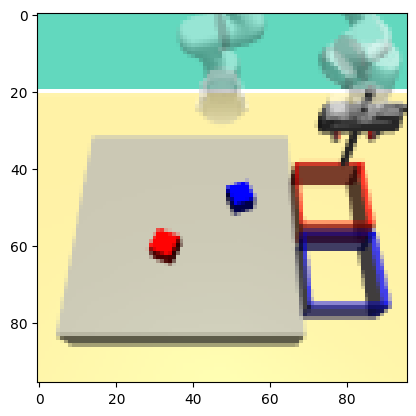

original obs  tensor([ 3.0820e-01,  3.4237e-01,  3.2879e-01,  3.4617e-01,  5.8071e-01,
        -1.4791e-01, -8.1255e-10, -7.0682e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -3.0597e-09, -2.7386e-09, -2.7069e+00])
obs  tensor([-0.7871,  1.2625, -0.6906,  1.1628,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


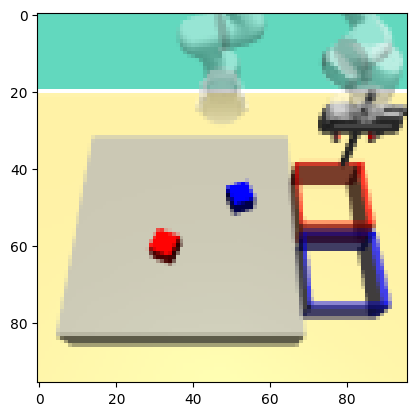

original obs  tensor([ 3.1653e-01,  3.5071e-01,  3.2541e-01,  3.4671e-01,  5.8071e-01,
        -1.4791e-01, -4.9873e-10, -4.3384e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.8780e-09, -1.6809e-09, -2.7069e+00])
obs  tensor([-0.7542,  1.2915, -0.7037,  1.1646,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9876, 1.0000])
true action  tensor([0.0082, 0.0083])
action type  delta


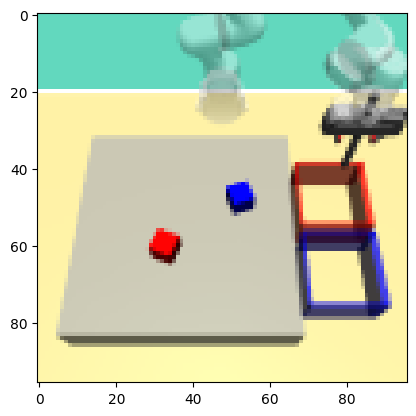

original obs  tensor([ 3.2476e-01,  3.5904e-01,  3.2472e-01,  3.4888e-01,  5.8071e-01,
        -1.4791e-01, -3.0611e-10, -2.6628e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.1527e-09, -1.0317e-09, -2.7069e+00])
obs  tensor([-0.7217,  1.3206, -0.7064,  1.1718,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.3843, 1.0000])
true action  tensor([0.0032, 0.0083])
action type  delta


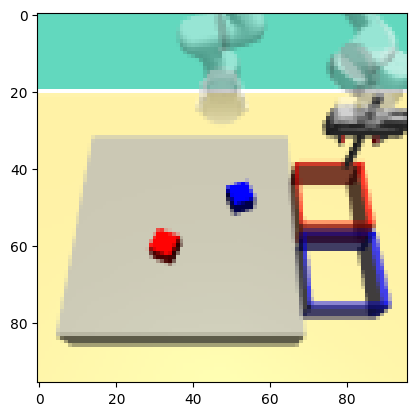

original obs  tensor([ 3.2796e-01,  3.6737e-01,  3.2640e-01,  3.5456e-01,  5.8071e-01,
        -1.4791e-01, -1.8789e-10, -1.6344e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -7.0749e-10, -6.3326e-10, -2.7069e+00])
obs  tensor([-0.7090,  1.3496, -0.6999,  1.1907,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


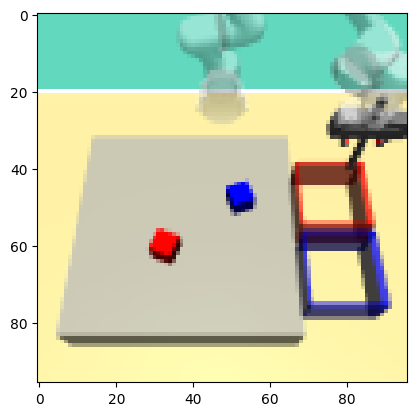

original obs  tensor([ 3.3630e-01,  3.7571e-01,  3.2842e-01,  3.6220e-01,  5.8071e-01,
        -1.4791e-01, -1.1532e-10, -1.0032e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -4.3425e-10, -3.8868e-10, -2.7069e+00])
obs  tensor([-0.6761,  1.3787, -0.6921,  1.2162,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


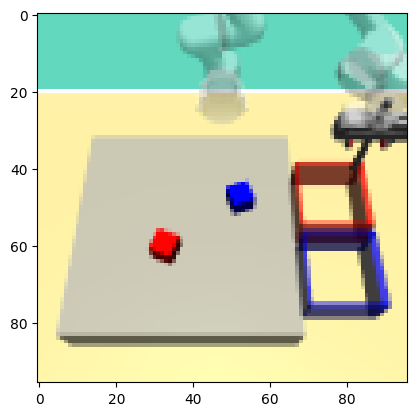

original obs  tensor([ 3.4463e-01,  3.8404e-01,  3.3226e-01,  3.7134e-01,  5.8071e-01,
        -1.4791e-01, -7.0783e-11, -6.1573e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.6653e-10, -2.3857e-10, -2.7069e+00])
obs  tensor([-0.6432,  1.4077, -0.6772,  1.2467,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.0803, 1.0000])
true action  tensor([0.0007, 0.0083])
action type  delta


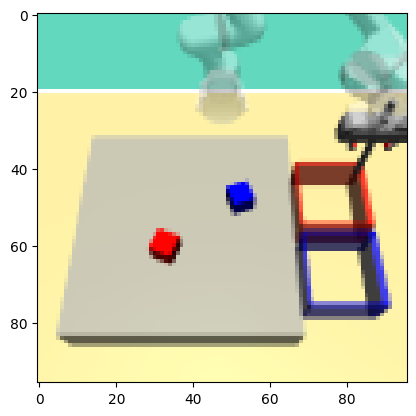

original obs  tensor([ 3.4530e-01,  3.9237e-01,  3.3772e-01,  3.8163e-01,  5.8071e-01,
        -1.4791e-01, -4.3445e-11, -3.7792e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.6359e-10, -1.4643e-10, -2.7069e+00])
obs  tensor([-0.6405,  1.4367, -0.6560,  1.2810,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


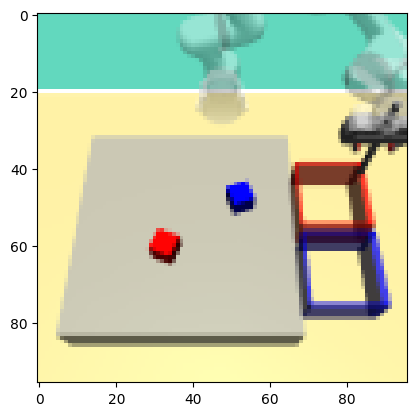

original obs  tensor([ 3.5363e-01,  4.0071e-01,  3.4213e-01,  3.9106e-01,  5.8071e-01,
        -1.4791e-01, -2.6666e-11, -2.3196e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.0041e-10, -8.9876e-11, -2.7069e+00])
obs  tensor([-0.6076,  1.4658, -0.6389,  1.3124,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


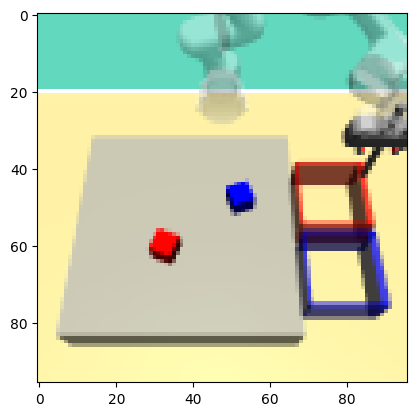

original obs  tensor([ 3.6197e-01,  4.0904e-01,  3.4793e-01,  4.0006e-01,  5.8071e-01,
        -1.4791e-01, -1.6367e-11, -1.4237e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -6.1631e-11, -5.5164e-11, -2.7069e+00])
obs  tensor([-0.5746,  1.4948, -0.6164,  1.3424,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9969,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


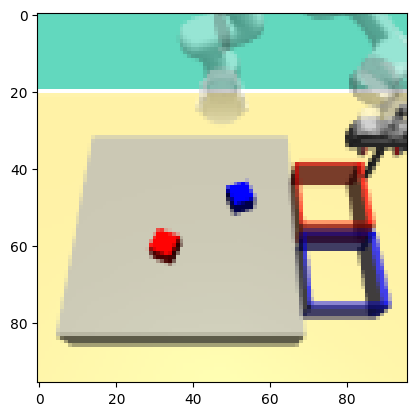

original obs  tensor([ 3.5366e-01,  4.1737e-01,  3.5505e-01,  4.0917e-01,  5.8071e-01,
        -1.4791e-01, -1.0046e-11, -8.7388e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -3.7828e-11, -3.3859e-11, -2.7069e+00])
obs  tensor([-0.6075,  1.5239, -0.5887,  1.3727,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


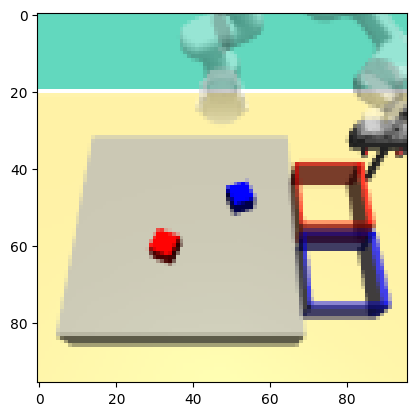

original obs  tensor([ 3.6199e-01,  4.2571e-01,  3.5776e-01,  4.1538e-01,  5.8071e-01,
        -1.4791e-01, -6.1661e-12, -5.3637e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.3218e-11, -2.0782e-11, -2.7069e+00])
obs  tensor([-0.5745,  1.5529, -0.5782,  1.3934,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9040,  1.0000])
true action  tensor([-0.0075,  0.0083])
action type  delta


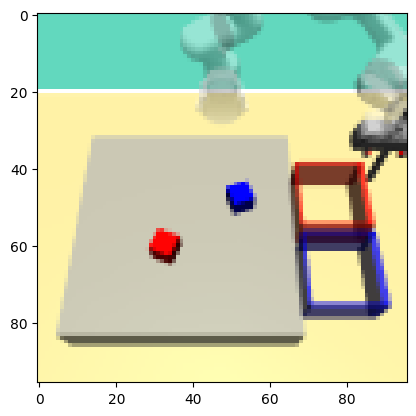

original obs  tensor([ 3.5446e-01,  4.3404e-01,  3.6217e-01,  4.2142e-01,  5.8071e-01,
        -1.4791e-01, -3.7847e-12, -3.2922e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.4251e-11, -1.2756e-11, -2.7069e+00])
obs  tensor([-0.6043,  1.5819, -0.5611,  1.4136,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


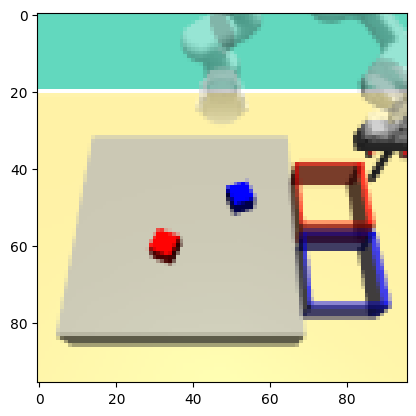

original obs  tensor([ 3.6279e-01,  4.4238e-01,  3.6312e-01,  4.2663e-01,  5.8071e-01,
        -1.4791e-01, -2.3230e-12, -2.0207e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -8.7470e-12, -7.8293e-12, -2.7069e+00])
obs  tensor([-0.5714,  1.6110, -0.5574,  1.4309,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


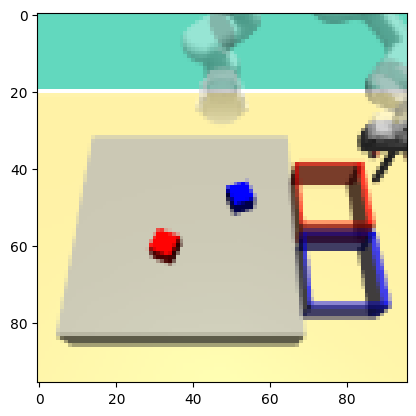

original obs  tensor([ 3.7112e-01,  4.5071e-01,  3.6593e-01,  4.3340e-01,  5.8071e-01,
        -1.4791e-01, -1.4258e-12, -1.2403e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -5.3687e-12, -4.8055e-12, -2.7069e+00])
obs  tensor([-0.5385,  1.6400, -0.5465,  1.4535,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9975, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


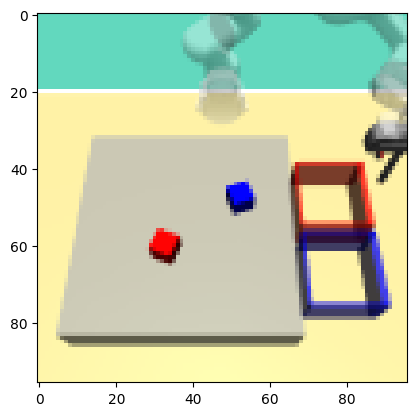

original obs  tensor([ 3.7944e-01,  4.5904e-01,  3.6953e-01,  4.4370e-01,  5.8071e-01,
        -1.4791e-01, -8.7512e-13, -7.6128e-13, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -3.2953e-12, -2.9495e-12, -2.7069e+00])
obs  tensor([-0.5056,  1.6690, -0.5325,  1.4878,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


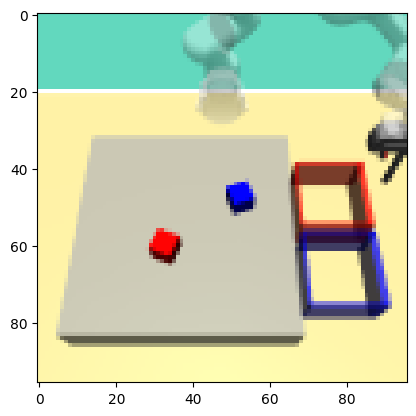

original obs  tensor([ 3.7110e-01,  4.6738e-01,  3.7344e-01,  4.5649e-01,  5.8071e-01,
        -1.4791e-01, -5.3711e-13, -4.6723e-13, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.0226e-12, -1.8103e-12, -2.7069e+00])
obs  tensor([-0.5385,  1.6981, -0.5173,  1.5304,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9697, 1.0000])
true action  tensor([0.0081, 0.0083])
action type  delta


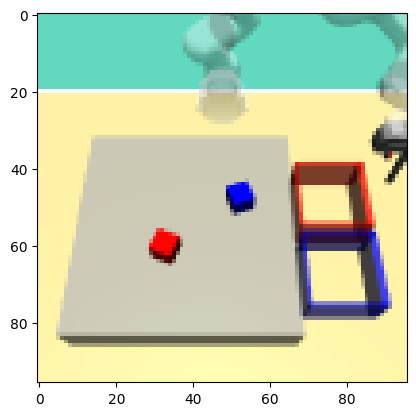

original obs  tensor([ 3.7918e-01,  4.7571e-01,  3.7364e-01,  4.6660e-01,  5.8071e-01,
        -1.4791e-01, -3.2969e-13, -2.8676e-13, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.2414e-12, -1.1111e-12, -2.7069e+00])
obs  tensor([-0.5066,  1.7271, -0.5166,  1.5641,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


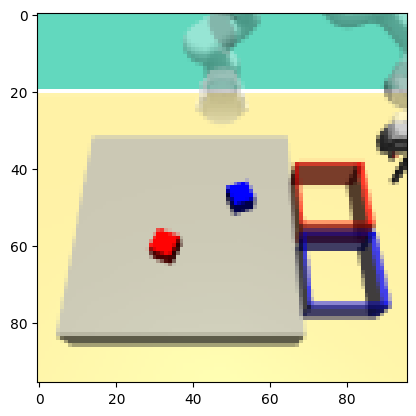

original obs  tensor([ 3.8752e-01,  4.8404e-01,  3.7488e-01,  4.7704e-01,  5.8071e-01,
        -1.4791e-01, -2.0236e-13, -1.7600e-13, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -7.6199e-13, -6.8196e-13, -2.7069e+00])
obs  tensor([-0.4737,  1.7562, -0.5118,  1.5989,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


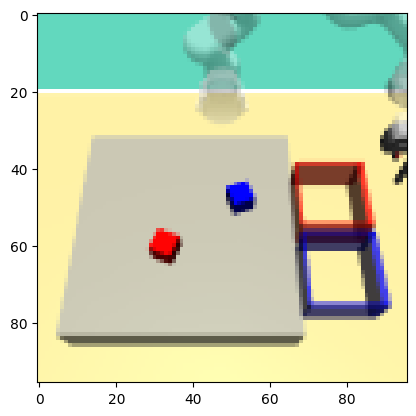

original obs  tensor([ 3.7918e-01,  4.9237e-01,  3.7802e-01,  4.8889e-01,  5.8071e-01,
        -1.4791e-01, -1.2421e-13, -1.0805e-13, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -4.6770e-13, -4.1860e-13, -2.7069e+00])
obs  tensor([-0.5066,  1.7852, -0.4996,  1.6384,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


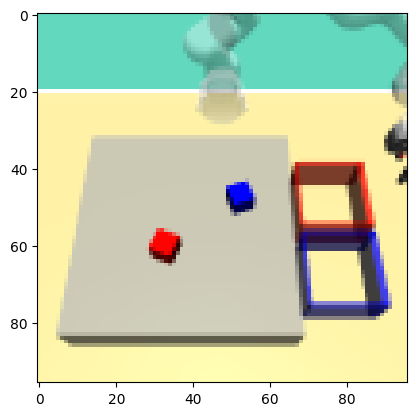

original obs  tensor([ 3.8752e-01,  5.0071e-01,  3.7821e-01,  4.9777e-01,  5.8071e-01,
        -1.4791e-01, -7.6225e-14, -6.6341e-14, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.8704e-13, -2.5691e-13, -2.7069e+00])
obs  tensor([-0.4737,  1.8142, -0.4988,  1.6680,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


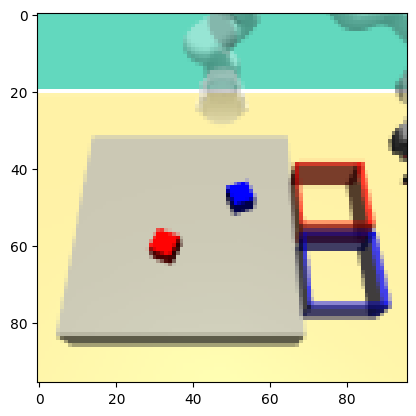

original obs  tensor([ 3.9585e-01,  5.0904e-01,  3.7974e-01,  5.0732e-01,  5.8071e-01,
        -1.4791e-01, -4.6763e-14, -4.0744e-14, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.7622e-13, -1.5769e-13, -2.7069e+00])
obs  tensor([-0.4407,  1.8433, -0.4929,  1.6998,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9183, 1.0000])
true action  tensor([0.0077, 0.0083])
action type  delta


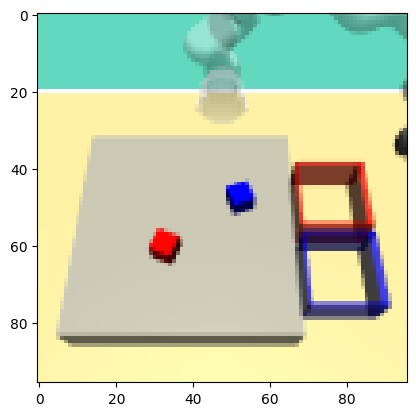

original obs  tensor([ 4.0350e-01,  5.1737e-01,  3.8333e-01,  5.1844e-01,  5.8071e-01,
        -1.4791e-01, -2.8691e-14, -2.5005e-14, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.0817e-13, -9.6776e-14, -2.7069e+00])
obs  tensor([-0.4105,  1.8723, -0.4790,  1.7369,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9998, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


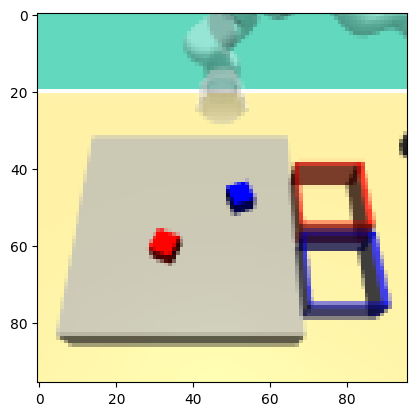

original obs  tensor([ 4.1183e-01,  5.2571e-01,  3.8824e-01,  5.3002e-01,  5.8071e-01,
        -1.4791e-01, -1.7615e-14, -1.5308e-14, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -6.6406e-14, -5.9384e-14, -2.7069e+00])
obs  tensor([-0.3776,  1.9014, -0.4599,  1.7755,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.8460,  1.0000])
true action  tensor([-0.0071,  0.0083])
action type  delta


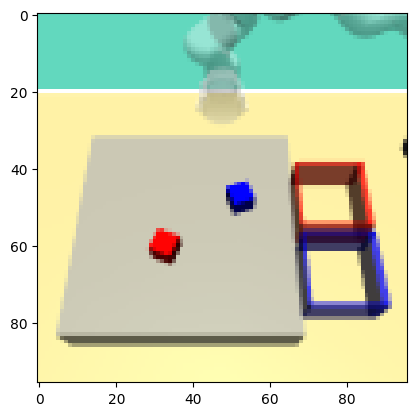

original obs  tensor([ 4.0478e-01,  5.3404e-01,  3.9419e-01,  5.4142e-01,  5.8071e-01,
        -1.4791e-01, -1.0823e-14, -9.3901e-15, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -4.0755e-14, -3.6491e-14, -2.7069e+00])
obs  tensor([-0.4054,  1.9304, -0.4368,  1.8134,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


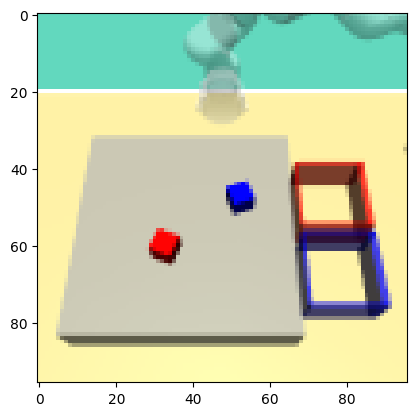

original obs  tensor([ 4.1312e-01,  5.4238e-01,  3.9713e-01,  5.4852e-01,  5.8071e-01,
        -1.4791e-01, -6.6253e-15, -5.7795e-15, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.5018e-14, -2.2423e-14, -2.7069e+00])
obs  tensor([-0.3725,  1.9594, -0.4254,  1.8371,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


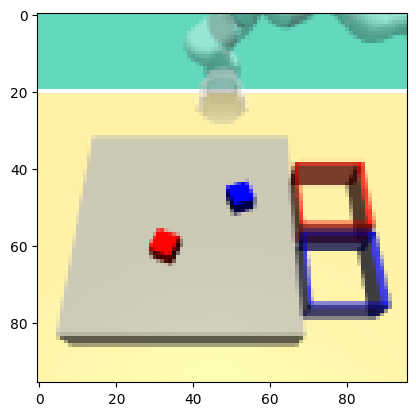

original obs  tensor([ 4.2145e-01,  5.5071e-01,  4.0109e-01,  5.5599e-01,  5.8071e-01,
        -1.4791e-01, -4.0496e-15, -3.5872e-15, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.5397e-14, -1.3721e-14, -2.7069e+00])
obs  tensor([-0.3396,  1.9885, -0.4100,  1.8620,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


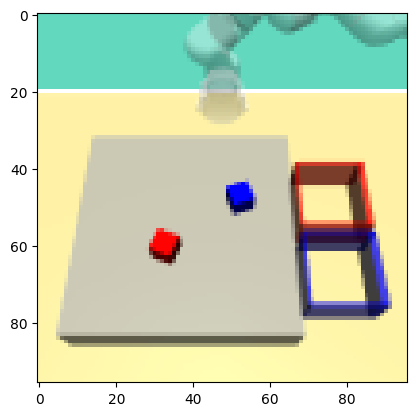

original obs  tensor([ 4.2978e-01,  5.5904e-01,  4.0677e-01,  5.6480e-01,  5.8071e-01,
        -1.4791e-01, -2.5171e-15, -2.1621e-15, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -9.4751e-15, -8.4400e-15, -2.7069e+00])
obs  tensor([-0.3066,  2.0175, -0.3880,  1.8914,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


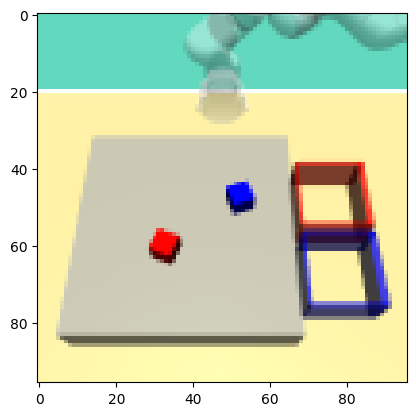

original obs  tensor([ 4.3812e-01,  5.6738e-01,  4.1369e-01,  5.7408e-01,  5.8071e-01,
        -1.4791e-01, -1.5154e-15, -1.2957e-15, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -5.8013e-15, -5.1893e-15, -2.7069e+00])
obs  tensor([-0.2737,  2.0465, -0.3611,  1.9223,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


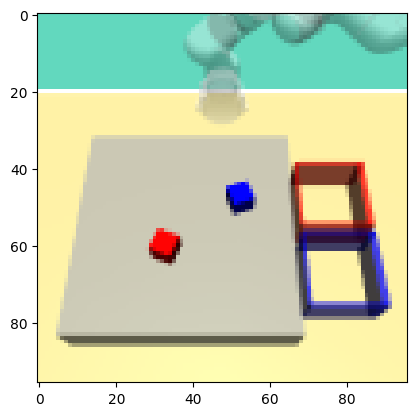

original obs  tensor([ 4.4645e-01,  5.7571e-01,  4.2142e-01,  5.8321e-01,  5.8071e-01,
        -1.4791e-01, -9.5838e-16, -7.6498e-16, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -3.5397e-15, -3.1596e-15, -2.7069e+00])
obs  tensor([-0.2408,  2.0756, -0.3311,  1.9527,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


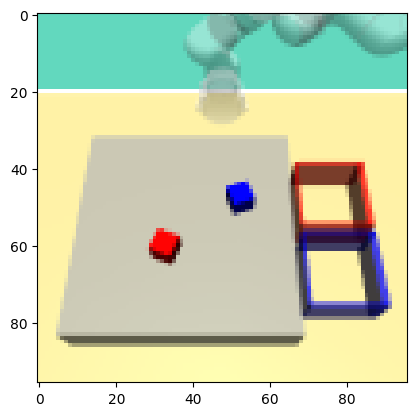

original obs  tensor([ 4.3812e-01,  5.8404e-01,  4.2972e-01,  5.9189e-01,  5.8071e-01,
        -1.4791e-01, -6.6932e-16, -4.5593e-16, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.1481e-15, -1.9216e-15, -2.7069e+00])
obs  tensor([-0.2737,  2.1046, -0.2989,  1.9816,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9997,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


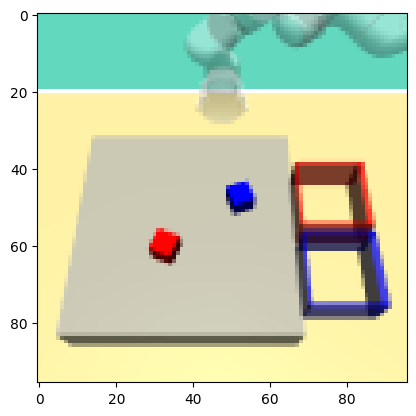

original obs  tensor([ 4.2979e-01,  5.9238e-01,  4.3412e-01,  5.9563e-01,  5.8071e-01,
        -1.4791e-01, -4.4630e-16, -2.9452e-16, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.3074e-15, -1.2337e-15, -2.7069e+00])
obs  tensor([-0.3066,  2.1337, -0.2818,  1.9941,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.2878, 1.0000])
true action  tensor([0.0024, 0.0083])
action type  delta


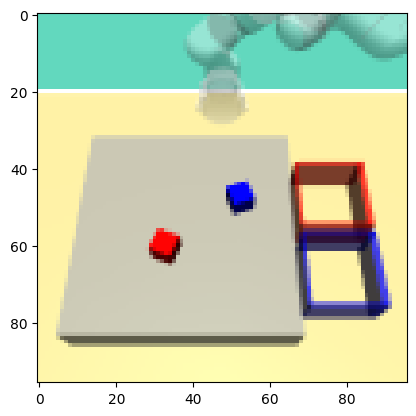

original obs  tensor([ 4.3218e-01,  6.0071e-01,  4.3541e-01,  5.9628e-01,  5.8071e-01,
        -1.4791e-01, -2.2722e-16, -1.9344e-16, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -7.8348e-16, -7.7174e-16, -2.7069e+00])
obs  tensor([-0.2971,  2.1627, -0.2768,  1.9963,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9683, 1.0000])
true action  tensor([0.0081, 0.0083])
action type  delta


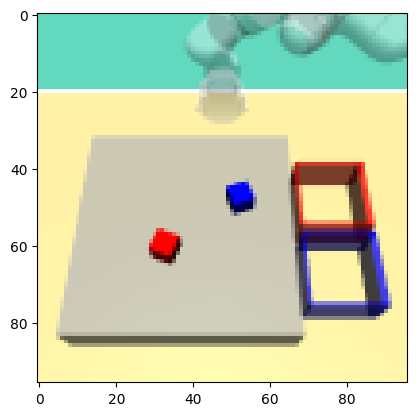

original obs  tensor([ 4.4025e-01,  6.0904e-01,  4.3750e-01,  5.9937e-01,  5.8071e-01,
        -1.4791e-01, -2.0969e-16, -1.0820e-16, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -5.1905e-16, -4.4306e-16, -2.7069e+00])
obs  tensor([-0.2653,  2.1917, -0.2687,  2.0066,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9999, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


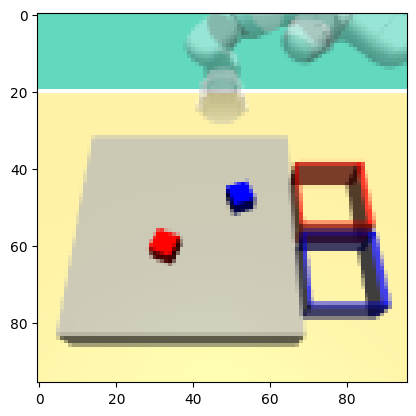

original obs  tensor([ 4.4859e-01,  6.1738e-01,  4.4153e-01,  6.0613e-01,  5.8071e-01,
        -1.4791e-01, -1.3967e-16, -1.0534e-16, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.8654e-16, -2.3996e-16, -2.7069e+00])
obs  tensor([-0.2323,  2.2208, -0.2531,  2.0291,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


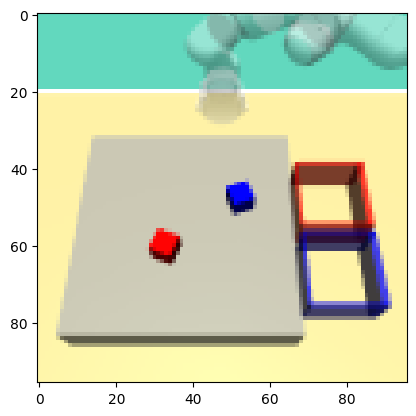

original obs  tensor([ 4.4025e-01,  6.2571e-01,  4.4700e-01,  6.1545e-01,  5.8071e-01,
        -1.4791e-01, -1.2962e-16, -7.0442e-17, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.1586e-16, -1.3178e-16, -2.7069e+00])
obs  tensor([-0.2653,  2.2498, -0.2318,  2.0602,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9998, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


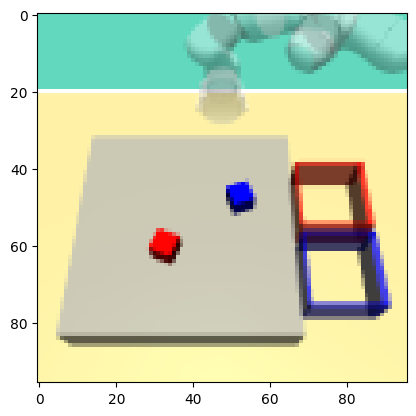

original obs  tensor([ 4.4858e-01,  6.3404e-01,  4.4897e-01,  6.2211e-01,  5.8071e-01,
        -1.4791e-01, -5.1051e-17, -1.2971e-17, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.7329e-16, -5.6666e-17, -2.7069e+00])
obs  tensor([-0.2323,  2.2789, -0.2242,  2.0824,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9457, 1.0000])
true action  tensor([0.0079, 0.0083])
action type  delta


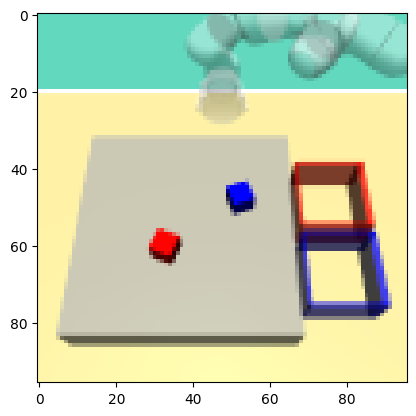

original obs  tensor([ 4.5646e-01,  6.4238e-01,  4.5128e-01,  6.2951e-01,  5.8071e-01,
        -1.4791e-01, -5.8389e-17, -2.4732e-18, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -6.9299e-17, -4.8825e-17, -2.7069e+00])
obs  tensor([-0.2012,  2.3079, -0.2152,  2.1070,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9998, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


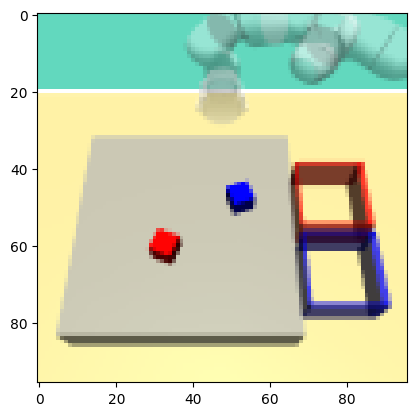

original obs  tensor([ 4.6480e-01,  6.5071e-01,  4.5381e-01,  6.3828e-01,  5.8071e-01,
        -1.4791e-01,  2.3995e-06,  2.6258e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -6.2160e-17, -3.4501e-17, -2.7069e+00])
obs  tensor([-0.1683,  2.3369, -0.2054,  2.1363,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9999,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


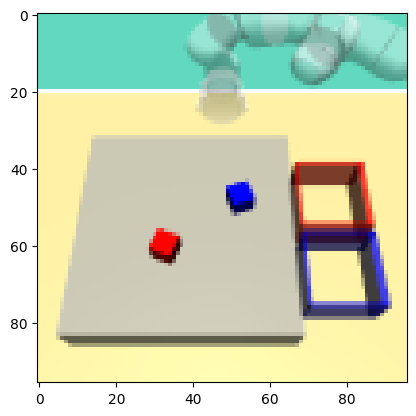

original obs  tensor([ 4.5646e-01,  6.5904e-01,  4.5599e-01,  6.4676e-01,  5.8071e-01,
        -1.4791e-01,  2.3576e-06,  2.5799e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -5.4552e-17, -2.8512e-18, -2.7069e+00])
obs  tensor([-0.2012,  2.3660, -0.1969,  2.1645,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


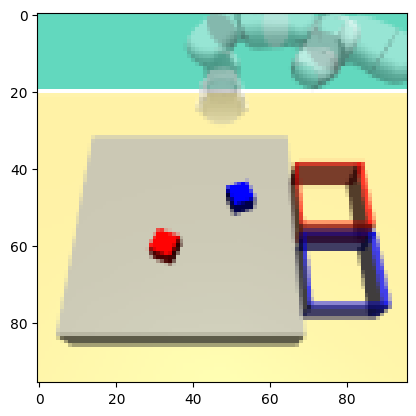

original obs  tensor([ 4.6480e-01,  6.6738e-01,  4.5568e-01,  6.5255e-01,  5.8071e-01,
        -1.4791e-01,  1.4823e-06,  1.6220e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -4.2748e-17,  1.3045e-17, -2.7069e+00])
obs  tensor([-0.1683,  2.3950, -0.1982,  2.1838,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9965, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


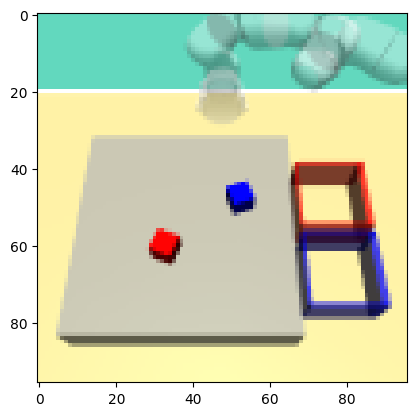

original obs  tensor([ 4.7310e-01,  6.7571e-01,  4.5465e-01,  6.5670e-01,  5.8071e-01,
        -1.4791e-01,  9.1119e-07,  9.9710e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -4.3585e-17,  1.1864e-18, -2.7069e+00])
obs  tensor([-0.1354,  2.4240, -0.2022,  2.1976,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.7873, 1.0000])
true action  tensor([0.0066, 0.0083])
action type  delta


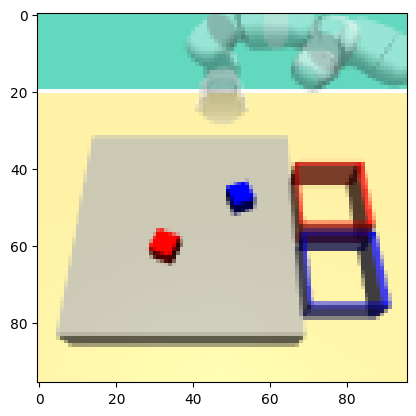

original obs  tensor([ 4.7966e-01,  6.8404e-01,  4.5382e-01,  6.5996e-01,  5.8071e-01,
        -1.4791e-01,  5.5933e-07,  6.1207e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -3.3232e-17, -3.0938e-17, -2.7069e+00])
obs  tensor([-0.1095,  2.4531, -0.2054,  2.2085,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


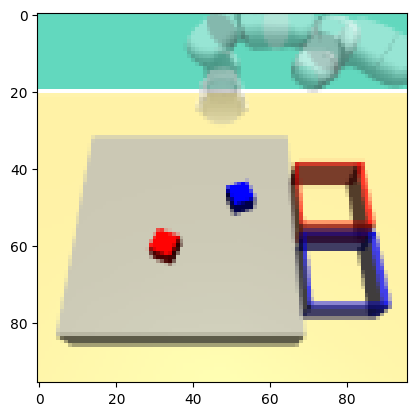

original obs  tensor([ 4.7133e-01,  6.9238e-01,  4.5291e-01,  6.6032e-01,  5.8071e-01,
        -1.4791e-01,  3.4331e-07,  3.7568e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -3.5509e-17,  1.7815e-17, -2.7069e+00])
obs  tensor([-0.1425,  2.4821, -0.2089,  2.2097,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.6688, 1.0000])
true action  tensor([0.0056, 0.0083])
action type  delta


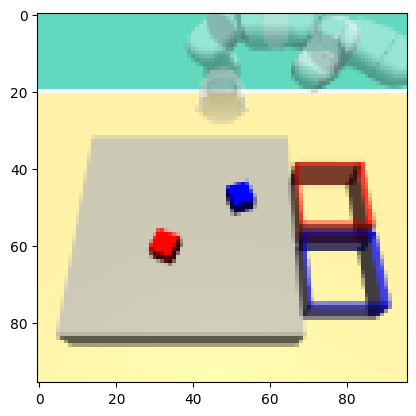

original obs  tensor([ 4.7690e-01,  7.0071e-01,  4.5178e-01,  6.5893e-01,  5.8071e-01,
        -1.4791e-01,  2.1072e-07,  2.3059e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -3.4287e-17,  2.4576e-17, -2.7069e+00])
obs  tensor([-0.1204,  2.5112, -0.2133,  2.2050,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


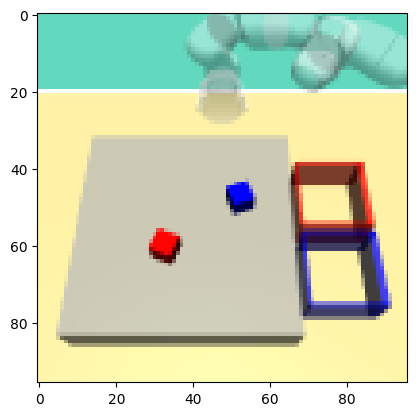

original obs  tensor([ 4.8524e-01,  7.0904e-01,  4.5149e-01,  6.5759e-01,  5.8071e-01,
        -1.4791e-01,  1.2934e-07,  1.4153e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -3.5895e-17,  2.1151e-17, -2.7069e+00])
obs  tensor([-0.0875,  2.5402, -0.2144,  2.2006,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


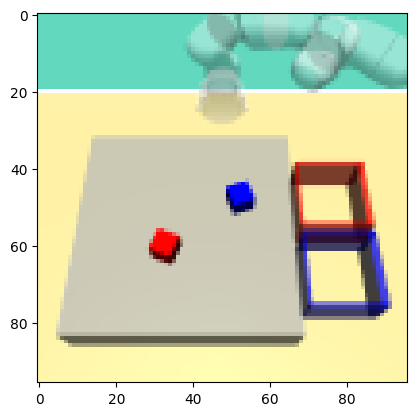

original obs  tensor([ 4.7690e-01,  7.1738e-01,  4.5253e-01,  6.5585e-01,  5.8071e-01,
        -1.4791e-01,  7.9384e-08,  8.6869e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -4.4823e-18, -3.0930e-17, -2.7069e+00])
obs  tensor([-0.1204,  2.5692, -0.2104,  2.1948,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


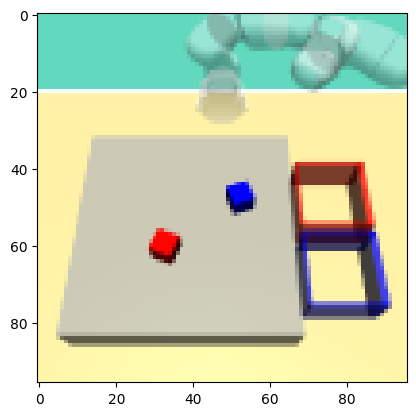

original obs  tensor([ 4.6857e-01,  7.2571e-01,  4.5394e-01,  6.5341e-01,  5.8071e-01,
        -1.4791e-01,  4.8725e-08,  5.3319e-08, -4.1218e-01,  4.3513e-01,
         4.9210e-02,  3.9715e-06,  6.1929e-06, -2.7069e+00])
obs  tensor([-0.1534,  2.5983, -0.2049,  2.1867,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9996,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


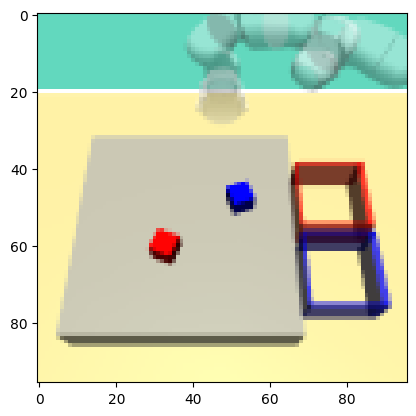

original obs  tensor([ 4.6024e-01,  7.3404e-01,  4.5528e-01,  6.5154e-01,  5.8071e-01,
        -1.4791e-01,  2.9906e-08,  3.2726e-08, -4.1218e-01,  4.3513e-01,
         4.9210e-02,  2.7250e-06,  4.2491e-06, -2.7069e+00])
obs  tensor([-0.1863,  2.6273, -0.1997,  2.1804,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9805, 1.0000])
true action  tensor([0.0082, 0.0083])
action type  delta


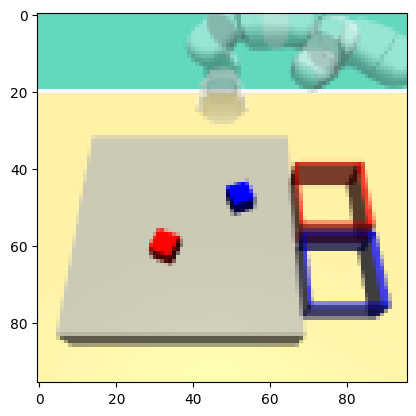

original obs  tensor([ 4.6841e-01,  7.4238e-01,  4.5607e-01,  6.5065e-01,  5.8071e-01,
        -1.4791e-01,  1.8356e-08,  2.0087e-08, -4.1218e-01,  4.3513e-01,
         4.9210e-02,  1.6840e-06,  2.6259e-06, -2.7069e+00])
obs  tensor([-0.1540,  2.6564, -0.1966,  2.1775,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


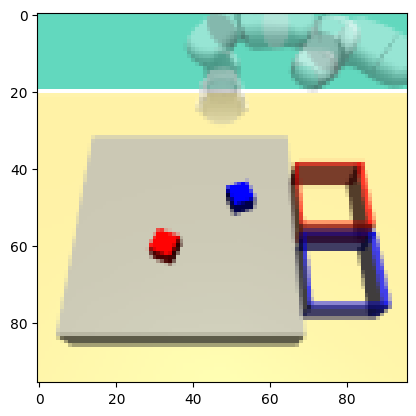

original obs  tensor([ 4.6008e-01,  7.5071e-01,  4.5715e-01,  6.5076e-01,  5.8071e-01,
        -1.4791e-01,  1.1267e-08,  1.2329e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.0341e-06,  1.6124e-06, -2.7069e+00])
obs  tensor([-0.1869,  2.6854, -0.1924,  2.1778,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


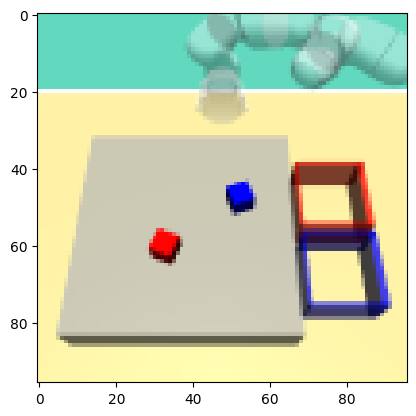

original obs  tensor([ 4.5174e-01,  7.5904e-01,  4.5765e-01,  6.5068e-01,  5.8071e-01,
        -1.4791e-01,  6.9153e-09,  7.5673e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  6.3472e-07,  9.8972e-07, -2.7069e+00])
obs  tensor([-0.2199,  2.7144, -0.1905,  2.1776,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


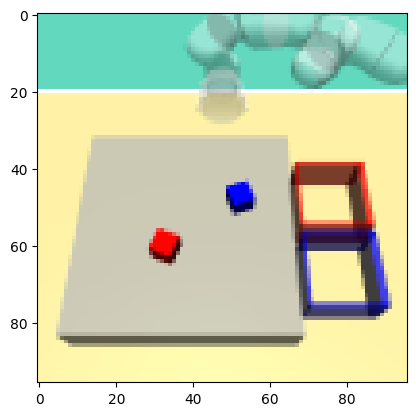

original obs  tensor([ 4.6008e-01,  7.6738e-01,  4.5729e-01,  6.5136e-01,  5.8071e-01,
        -1.4791e-01,  4.2445e-09,  4.6447e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  3.8958e-07,  6.0748e-07, -2.7069e+00])
obs  tensor([-0.1869,  2.7435, -0.1919,  2.1798,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


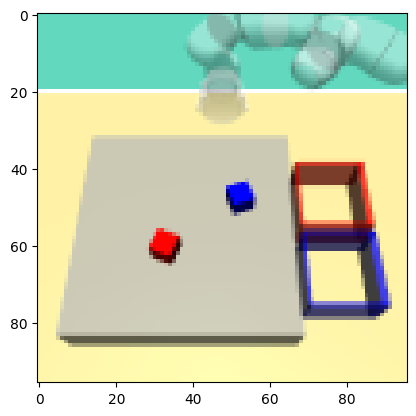

original obs  tensor([ 4.6841e-01,  7.7571e-01,  4.5703e-01,  6.5299e-01,  5.8071e-01,
        -1.4791e-01,  2.6052e-09,  2.8508e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.3912e-07,  3.7286e-07, -2.7069e+00])
obs  tensor([-0.1540,  2.7725, -0.1929,  2.1852,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9997,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


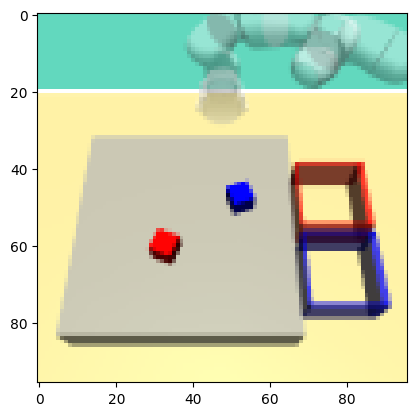

original obs  tensor([ 4.6008e-01,  7.8404e-01,  4.5728e-01,  6.5428e-01,  5.8071e-01,
        -1.4791e-01,  1.5990e-09,  1.7498e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.4677e-07,  2.2885e-07, -2.7069e+00])
obs  tensor([-0.1869,  2.8015, -0.1919,  2.1896,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9998,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


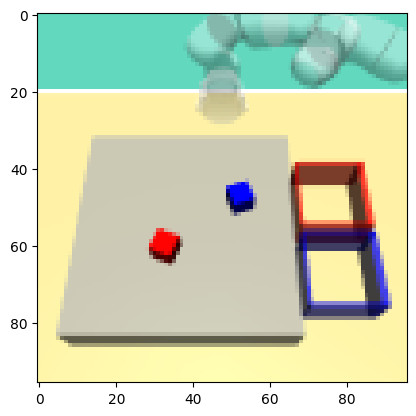

original obs  tensor([ 4.5175e-01,  7.9238e-01,  4.5716e-01,  6.5494e-01,  5.8071e-01,
        -1.4791e-01,  9.8146e-10,  1.0740e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  9.0083e-08,  1.4047e-07, -2.7069e+00])
obs  tensor([-0.2198,  2.8306, -0.1924,  2.1917,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.8933, 1.0000])
true action  tensor([0.0074, 0.0083])
action type  delta


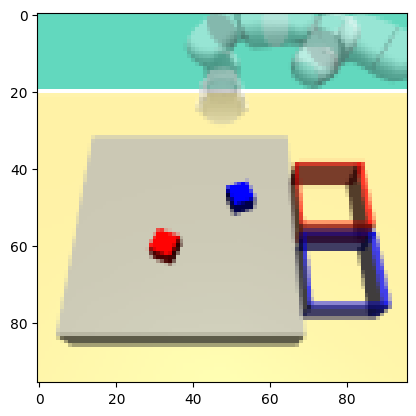

original obs  tensor([ 4.5919e-01,  8.0071e-01,  4.5632e-01,  6.5613e-01,  5.8071e-01,
        -1.4791e-01,  6.0241e-10,  6.5920e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  5.5292e-08,  8.6217e-08, -2.7069e+00])
obs  tensor([-0.1904,  2.8596, -0.1957,  2.1957,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9982, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


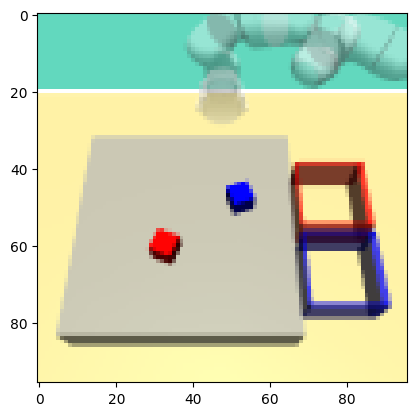

original obs  tensor([ 4.6751e-01,  8.0904e-01,  4.5561e-01,  6.5805e-01,  5.8071e-01,
        -1.4791e-01,  3.6975e-10,  4.0461e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  3.3937e-08,  5.2918e-08, -2.7069e+00])
obs  tensor([-0.1575,  2.8887, -0.1984,  2.2021,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


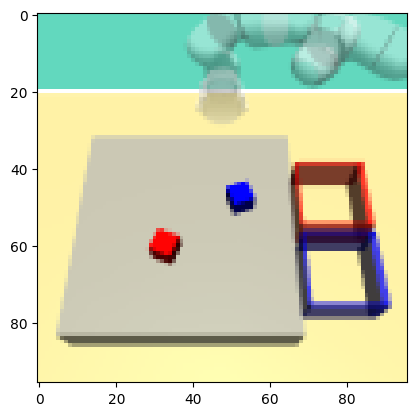

original obs  tensor([ 4.5918e-01,  8.1738e-01,  4.5546e-01,  6.5952e-01,  5.8071e-01,
        -1.4791e-01,  2.2694e-10,  2.4834e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.0830e-08,  3.2480e-08, -2.7069e+00])
obs  tensor([-0.1905,  2.9177, -0.1990,  2.2070,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


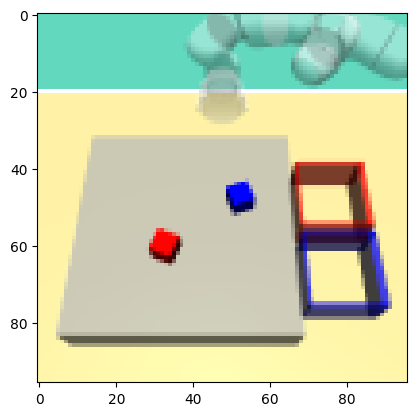

original obs  tensor([ 4.5084e-01,  8.2571e-01,  4.5500e-01,  6.6023e-01,  5.8071e-01,
        -1.4791e-01,  1.3929e-10,  1.5243e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.2785e-08,  1.9936e-08, -2.7069e+00])
obs  tensor([-0.2234,  2.9467, -0.2008,  2.2094,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9317, 1.0000])
true action  tensor([0.0078, 0.0083])
action type  delta


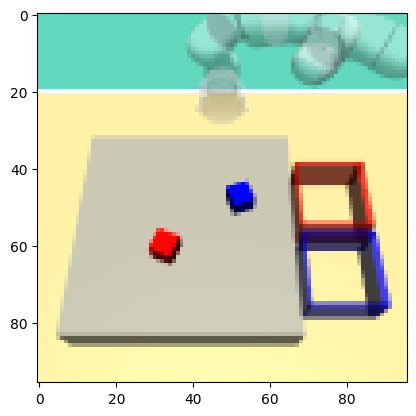

original obs  tensor([ 4.5861e-01,  8.3404e-01,  4.5387e-01,  6.6132e-01,  5.8071e-01,
        -1.4791e-01,  8.5497e-11,  9.3558e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  7.8473e-09,  1.2236e-08, -2.7069e+00])
obs  tensor([-0.1927,  2.9758, -0.2052,  2.2130,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9998,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


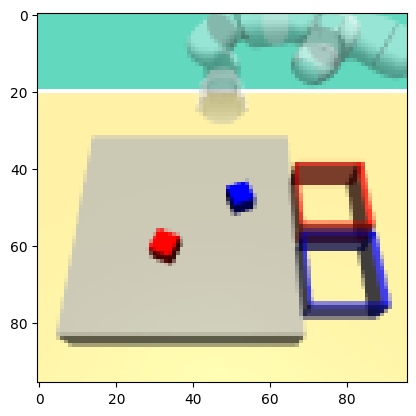

original obs  tensor([ 4.5027e-01,  8.4238e-01,  4.5296e-01,  6.6300e-01,  5.8071e-01,
        -1.4791e-01,  5.2477e-11,  5.7425e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  4.8166e-09,  7.5105e-09, -2.7069e+00])
obs  tensor([-0.2257,  3.0048, -0.2087,  2.2186,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.7710, 1.0000])
true action  tensor([0.0064, 0.0083])
action type  delta


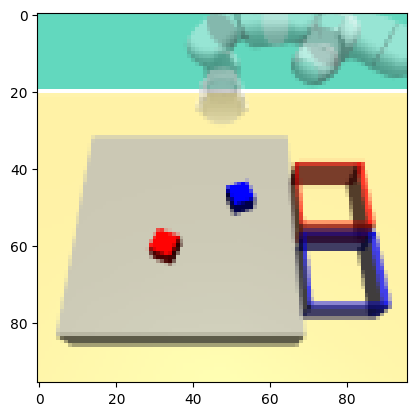

original obs  tensor([ 4.5670e-01,  8.5071e-01,  4.5147e-01,  6.6422e-01,  5.8071e-01,
        -1.4791e-01,  3.2209e-11,  3.5246e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.9563e-09,  4.6098e-09, -2.7069e+00])
obs  tensor([-0.2003,  3.0338, -0.2145,  2.2227,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9013,  1.0000])
true action  tensor([-0.0075,  0.0083])
action type  delta


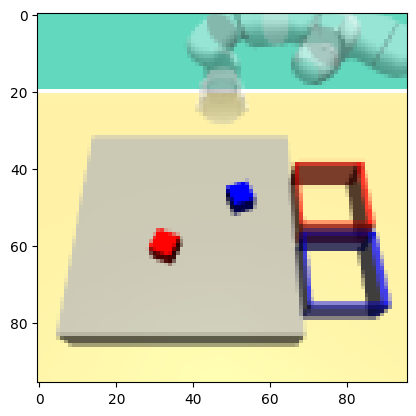

original obs  tensor([ 4.4919e-01,  8.5904e-01,  4.5024e-01,  6.6574e-01,  5.8071e-01,
        -1.4791e-01,  1.9770e-11,  2.1634e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.8145e-09,  2.8294e-09, -2.7069e+00])
obs  tensor([-0.2300,  3.0629, -0.2193,  2.2277,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9843, 1.0000])
true action  tensor([0.0082, 0.0083])
action type  delta


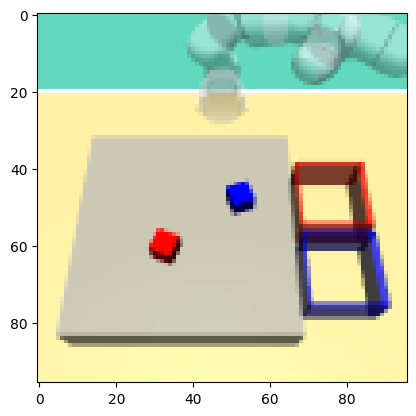

original obs  tensor([ 4.5739e-01,  8.6738e-01,  4.4858e-01,  6.6682e-01,  5.8071e-01,
        -1.4791e-01,  1.2134e-11,  1.3278e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.1137e-09,  1.7367e-09, -2.7069e+00])
obs  tensor([-0.1975,  3.0919, -0.2257,  2.2313,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9231, 1.0000])
true action  tensor([0.0077, 0.0083])
action type  delta


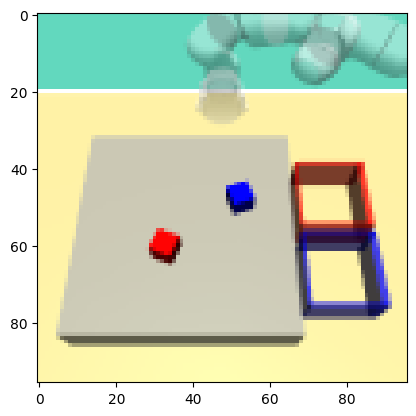

original obs  tensor([ 4.6508e-01,  8.7571e-01,  4.4740e-01,  6.6809e-01,  5.8071e-01,
        -1.4791e-01,  7.4479e-12,  8.1501e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  6.8360e-10,  1.0659e-09, -2.7069e+00])
obs  tensor([-0.1671,  3.1210, -0.2303,  2.2356,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


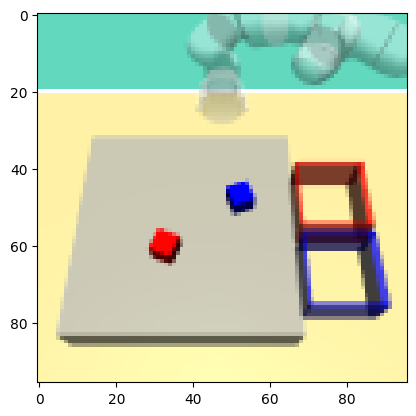

original obs  tensor([ 4.5675e-01,  8.8404e-01,  4.4712e-01,  6.6863e-01,  5.8071e-01,
        -1.4791e-01,  4.5714e-12,  5.0024e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  4.1958e-10,  6.5425e-10, -2.7069e+00])
obs  tensor([-0.2001,  3.1500, -0.2314,  2.2374,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


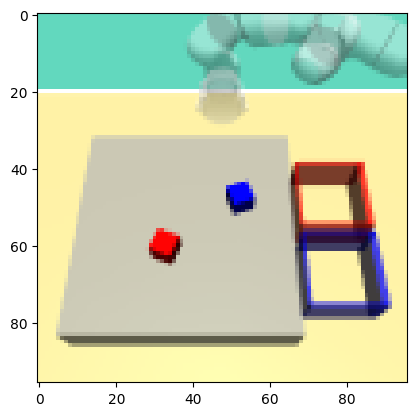

original obs  tensor([ 4.4842e-01,  8.9238e-01,  4.4681e-01,  6.6827e-01,  5.8071e-01,
        -1.4791e-01,  2.8058e-12,  3.0704e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.5753e-10,  4.0157e-10, -2.7069e+00])
obs  tensor([-0.2330,  3.1790, -0.2326,  2.2362,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


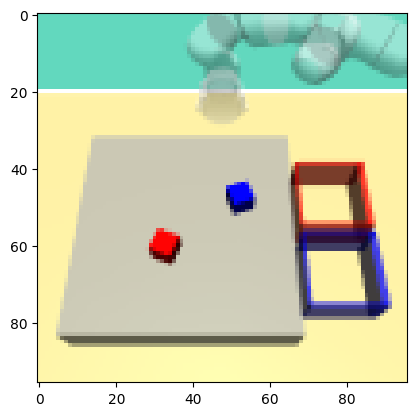

original obs  tensor([ 4.4008e-01,  9.0071e-01,  4.4603e-01,  6.6818e-01,  5.8071e-01,
        -1.4791e-01,  1.7221e-12,  1.8845e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.5807e-10,  2.4648e-10, -2.7069e+00])
obs  tensor([-0.2659,  3.2081, -0.2356,  2.2359,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9996,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


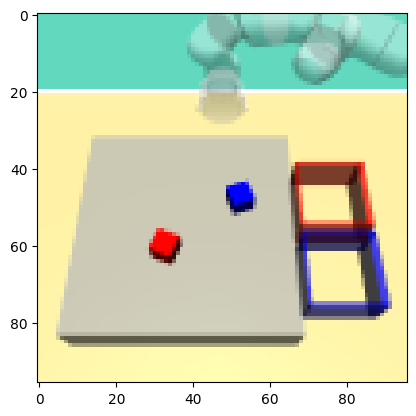

original obs  tensor([ 4.3175e-01,  9.0904e-01,  4.4443e-01,  6.6871e-01,  5.8071e-01,
        -1.4791e-01,  1.0570e-12,  1.1567e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  9.7020e-11,  1.5128e-10, -2.7069e+00])
obs  tensor([-0.2989,  3.2371, -0.2418,  2.2376,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


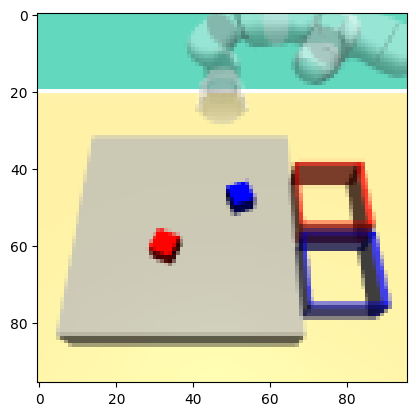

original obs  tensor([ 4.4008e-01,  9.1738e-01,  4.4177e-01,  6.6996e-01,  5.8071e-01,
        -1.4791e-01,  6.4878e-13,  7.0997e-13, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  5.9549e-11,  9.2856e-11, -2.7069e+00])
obs  tensor([-0.2659,  3.2662, -0.2521,  2.2418,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9972, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


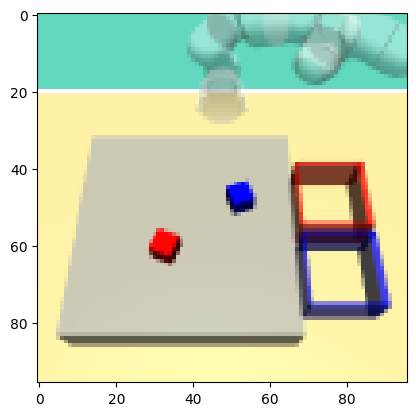

original obs  tensor([ 4.4840e-01,  9.2571e-01,  4.3913e-01,  6.7183e-01,  5.8071e-01,
        -1.4791e-01,  3.9818e-13,  4.3577e-13, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  3.6550e-11,  5.6993e-11, -2.7069e+00])
obs  tensor([-0.2331,  3.2952, -0.2624,  2.2481,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.8549, 1.0000])
true action  tensor([0.0071, 0.0083])
action type  delta


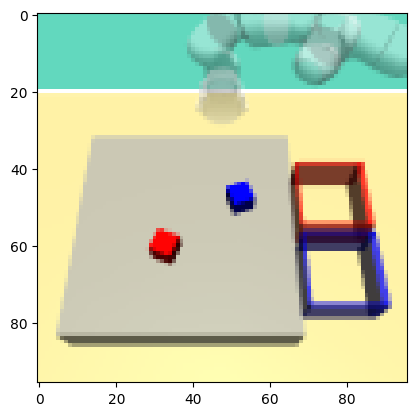

original obs  tensor([ 4.5552e-01,  9.3404e-01,  4.3713e-01,  6.7314e-01,  5.8071e-01,
        -1.4791e-01,  2.4439e-13,  2.6753e-13, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.2434e-11,  3.4982e-11, -2.7069e+00])
obs  tensor([-0.2049,  3.3242, -0.2702,  2.2524,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


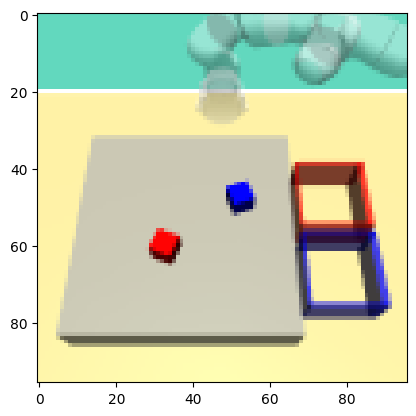

original obs  tensor([ 4.4719e-01,  9.4238e-01,  4.3615e-01,  6.7353e-01,  5.8071e-01,
        -1.4791e-01,  1.5003e-13,  1.6418e-13, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.3770e-11,  2.1471e-11, -2.7069e+00])
obs  tensor([-0.2379,  3.3533, -0.2739,  2.2537,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9923,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


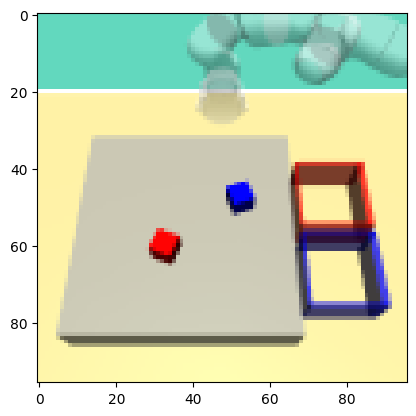

original obs  tensor([ 4.3892e-01,  9.5071e-01,  4.3533e-01,  6.7306e-01,  5.8071e-01,
        -1.4791e-01,  9.2084e-14,  1.0078e-13, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  8.4516e-12,  1.3179e-11, -2.7069e+00])
obs  tensor([-0.2705,  3.3823, -0.2771,  2.2521,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


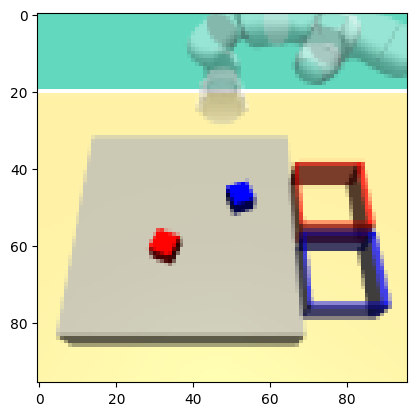

original obs  tensor([ 4.3058e-01,  9.5904e-01,  4.3419e-01,  6.7289e-01,  5.8071e-01,
        -1.4791e-01,  5.6542e-14,  6.1853e-14, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  5.1874e-12,  8.0888e-12, -2.7069e+00])
obs  tensor([-0.3035,  3.4113, -0.2815,  2.2516,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


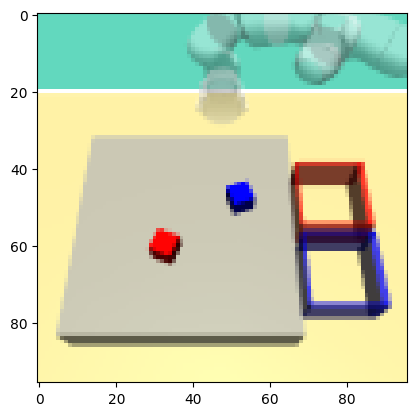

original obs  tensor([ 4.3892e-01,  9.6738e-01,  4.3237e-01,  6.7335e-01,  5.8071e-01,
        -1.4791e-01,  3.4717e-14,  3.7956e-14, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  3.1840e-12,  4.9648e-12, -2.7069e+00])
obs  tensor([-0.2705,  3.4404, -0.2886,  2.2531,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


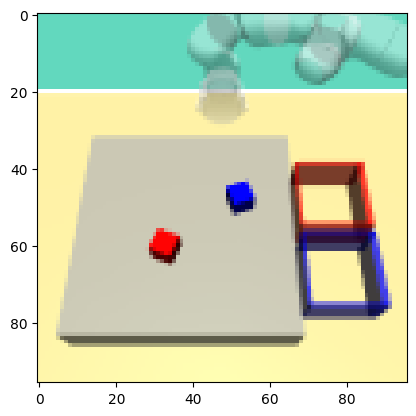

original obs  tensor([ 4.3058e-01,  9.7571e-01,  4.3081e-01,  6.7444e-01,  5.8071e-01,
        -1.4791e-01,  2.1293e-14,  2.3284e-14, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.9543e-12,  3.0473e-12, -2.7069e+00])
obs  tensor([-0.3035,  3.4694, -0.2947,  2.2567,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


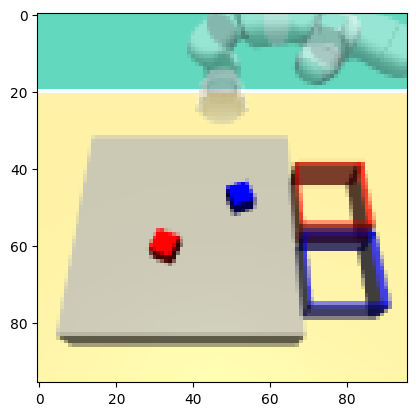

original obs  tensor([ 4.3892e-01,  9.8404e-01,  4.2883e-01,  6.7508e-01,  5.8071e-01,
        -1.4791e-01,  1.3065e-14,  1.4304e-14, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.1995e-12,  1.8704e-12, -2.7069e+00])
obs  tensor([-0.2705,  3.4985, -0.3023,  2.2589,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.3608, 1.0000])
true action  tensor([0.0030, 0.0083])
action type  delta


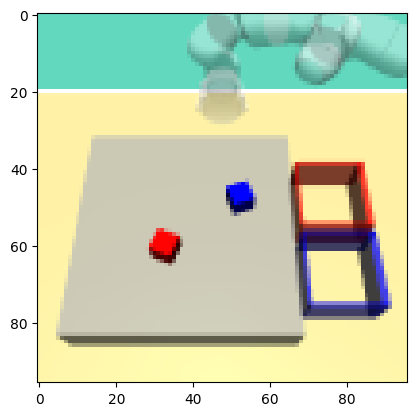

original obs  tensor([ 4.4192e-01,  9.9238e-01,  4.2738e-01,  6.7605e-01,  5.8071e-01,
        -1.4791e-01,  8.0259e-15,  8.7539e-15, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  7.3623e-13,  1.1480e-12, -2.7069e+00])
obs  tensor([-0.2587,  3.5275, -0.3080,  2.2621,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9854,  1.0000])
true action  tensor([-0.0082,  0.0083])
action type  delta


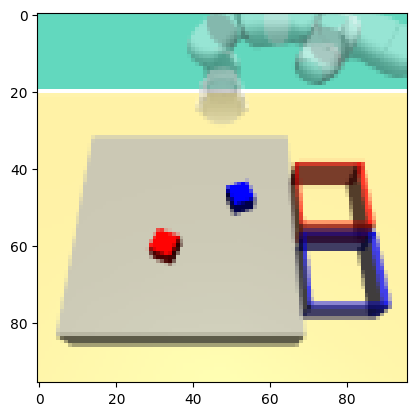

original obs  tensor([ 4.3371e-01,  1.0007e+00,  4.2654e-01,  6.7647e-01,  5.8071e-01,
        -1.4791e-01,  4.9278e-15,  5.3744e-15, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  4.5189e-13,  7.0462e-13, -2.7069e+00])
obs  tensor([-0.2911,  3.5565, -0.3112,  2.2635,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9955,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


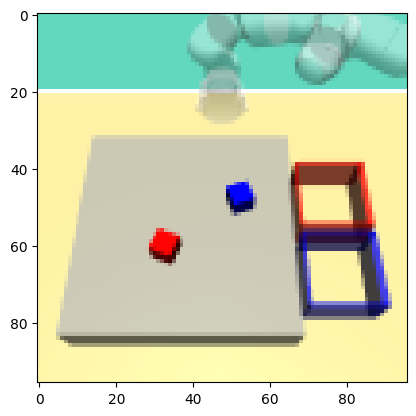

original obs  tensor([ 4.2541e-01,  1.0090e+00,  4.2560e-01,  6.7646e-01,  5.8071e-01,
        -1.4791e-01,  3.0513e-15,  3.2847e-15, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.7740e-13,  4.3249e-13, -2.7069e+00])
obs  tensor([-0.3239,  3.5856, -0.3149,  2.2635,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


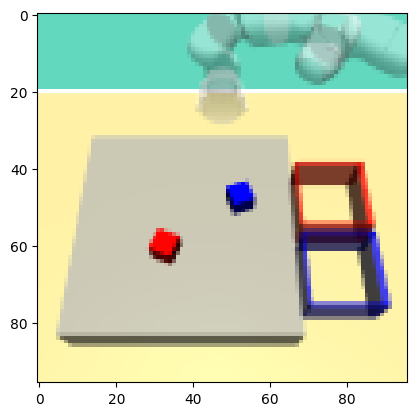

original obs  tensor([ 4.1708e-01,  1.0174e+00,  4.2417e-01,  6.7689e-01,  5.8071e-01,
        -1.4791e-01,  1.8843e-15,  2.0189e-15, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.7027e-13,  2.6544e-13, -2.7069e+00])
obs  tensor([-0.3568,  3.6146, -0.3205,  2.2649,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9918,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


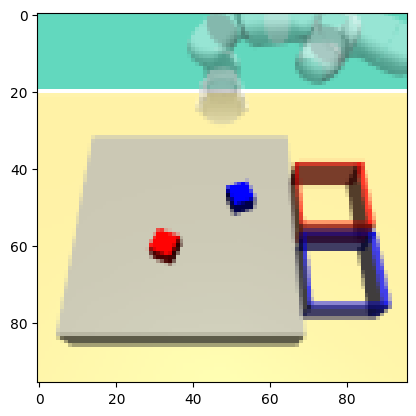

original obs  tensor([ 4.0882e-01,  1.0257e+00,  4.2194e-01,  6.7801e-01,  5.8071e-01,
        -1.4791e-01,  1.1468e-15,  1.2110e-15, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.0451e-13,  1.6295e-13, -2.7069e+00])
obs  tensor([-0.3895,  3.6437, -0.3291,  2.2686,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9680, 1.0000])
true action  tensor([0.0081, 0.0083])
action type  delta


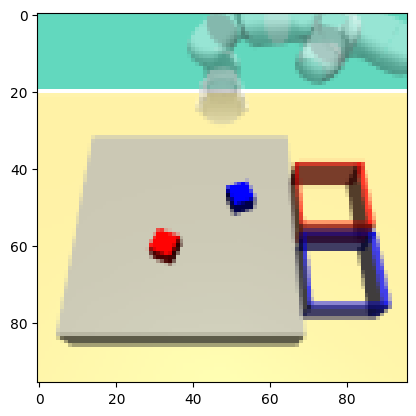

original obs  tensor([ 4.1688e-01,  1.0340e+00,  4.1870e-01,  6.7989e-01,  5.8071e-01,
        -1.4791e-01,  6.8566e-16,  7.5285e-16, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  6.4123e-14,  1.0006e-13, -2.7069e+00])
obs  tensor([-0.3576,  3.6727, -0.3417,  2.2749,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9200, 1.0000])
true action  tensor([0.0077, 0.0083])
action type  delta


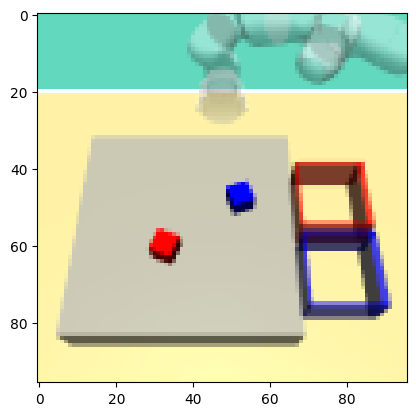

original obs  tensor([ 4.2455e-01,  1.0424e+00,  4.1551e-01,  6.8242e-01,  5.8071e-01,
        -1.4791e-01,  4.3829e-16,  4.4707e-16, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  3.9366e-14,  6.1391e-14, -2.7069e+00])
obs  tensor([-0.3273,  3.7017, -0.3541,  2.2833,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.8725,  1.0000])
true action  tensor([-0.0073,  0.0083])
action type  delta


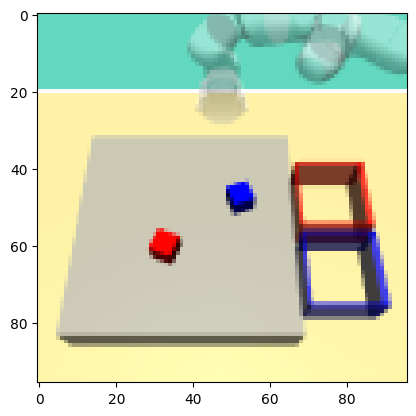

original obs  tensor([ 4.1728e-01,  1.0507e+00,  4.1297e-01,  6.8446e-01,  5.8071e-01,
        -1.4791e-01,  2.5912e-16,  2.3498e-16, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.4193e-14,  3.7670e-14, -2.7069e+00])
obs  tensor([-0.3561,  3.7308, -0.3639,  2.2901,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9516, 1.0000])
true action  tensor([0.0079, 0.0083])
action type  delta


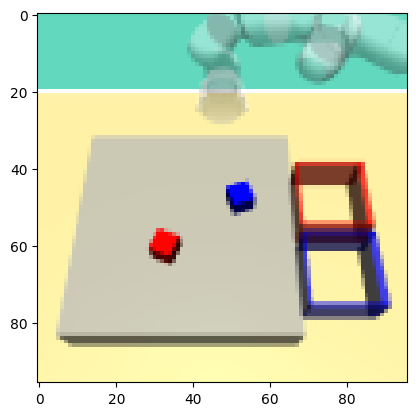

original obs  tensor([ 4.2521e-01,  1.0590e+00,  4.1047e-01,  6.8577e-01,  5.8071e-01,
        -1.4791e-01,  1.6735e-16,  1.2136e-16, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.4844e-14,  2.3074e-14, -2.7069e+00])
obs  tensor([-0.3247,  3.7598, -0.3736,  2.2945,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


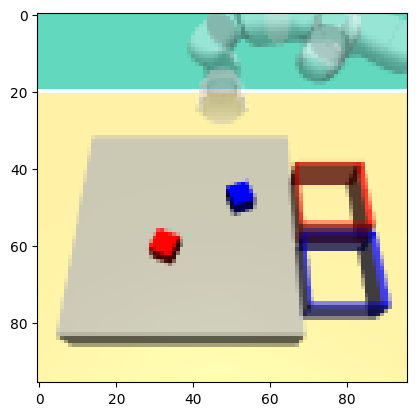

original obs  tensor([ 4.1688e-01,  1.0674e+00,  4.0881e-01,  6.8721e-01,  5.8071e-01,
        -1.4791e-01,  1.4671e-16,  8.1165e-17, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  9.1038e-15,  1.4125e-14, -2.7069e+00])
obs  tensor([-0.3576,  3.7888, -0.3801,  2.2993,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9719, 1.0000])
true action  tensor([0.0081, 0.0083])
action type  delta


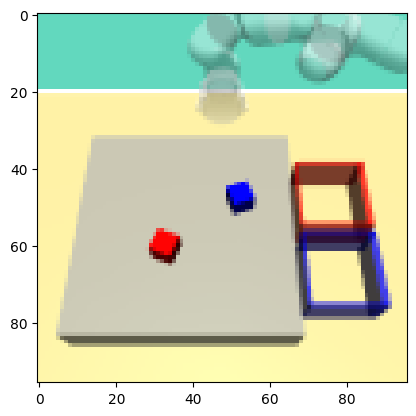

original obs  tensor([ 4.2497e-01,  1.0757e+00,  4.0719e-01,  6.8803e-01,  5.8071e-01,
        -1.4791e-01,  1.0256e-16,  1.1100e-17, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  5.6035e-15,  8.6517e-15, -2.7069e+00])
obs  tensor([-0.3256,  3.8179, -0.3864,  2.3020,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9933, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


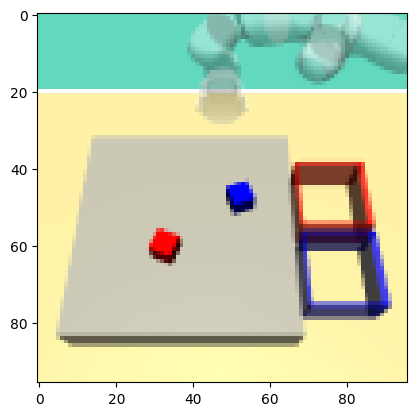

original obs  tensor([ 4.3325e-01,  1.0840e+00,  4.0638e-01,  6.8903e-01,  5.8071e-01,
        -1.4791e-01,  6.8246e-17,  4.2784e-17, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  3.4232e-15,  5.2805e-15, -2.7069e+00])
obs  tensor([-0.2929,  3.8469, -0.3895,  2.3054,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


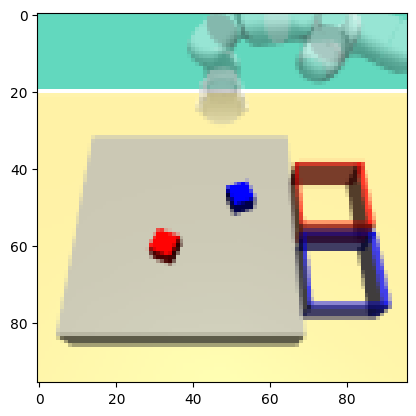

original obs  tensor([ 4.2492e-01,  1.0924e+00,  4.0678e-01,  6.8934e-01,  5.8071e-01,
        -1.4791e-01,  8.6772e-17,  1.5905e-17, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.0769e-15,  3.2071e-15, -2.7069e+00])
obs  tensor([-0.3259,  3.8760, -0.3879,  2.3064,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


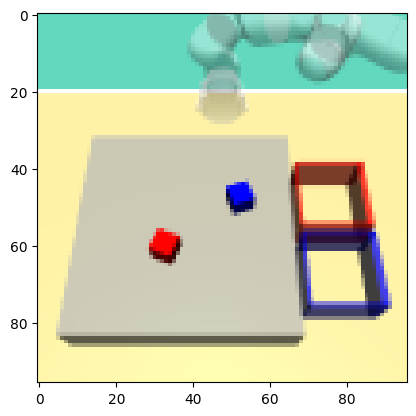

original obs  tensor([ 4.1659e-01,  1.1007e+00,  4.0747e-01,  6.8873e-01,  5.8071e-01,
        -1.4791e-01,  9.0332e-17,  2.2906e-17, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.2352e-15,  1.9422e-15, -2.7069e+00])
obs  tensor([-0.3588,  3.9050, -0.3852,  2.3044,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


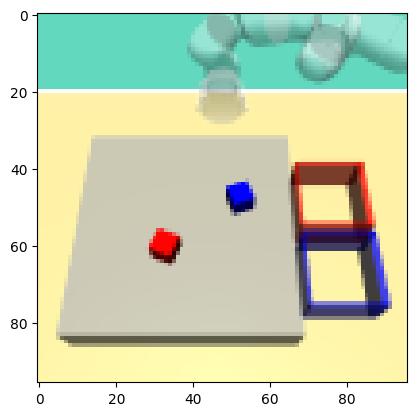

original obs  tensor([ 4.2492e-01,  1.1090e+00,  4.0791e-01,  6.8834e-01,  5.8071e-01,
        -1.4791e-01, -2.5793e-06,  3.8952e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  7.7215e-16,  1.1934e-15, -2.7069e+00])
obs  tensor([-0.3259,  3.9340, -0.3836,  2.3031,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


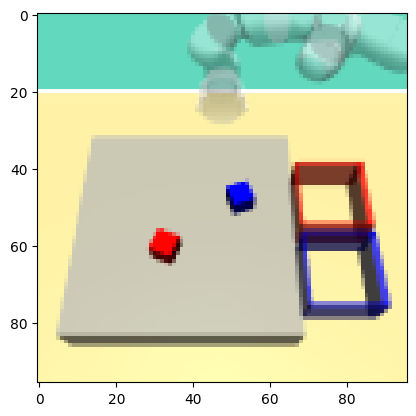

original obs  tensor([ 4.1658e-01,  1.1174e+00,  4.0885e-01,  6.8841e-01,  5.8071e-01,
        -1.4791e-01, -1.9383e-06,  2.9272e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  4.8864e-16,  7.3945e-16, -2.7069e+00])
obs  tensor([-0.3588,  3.9631, -0.3799,  2.3033,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


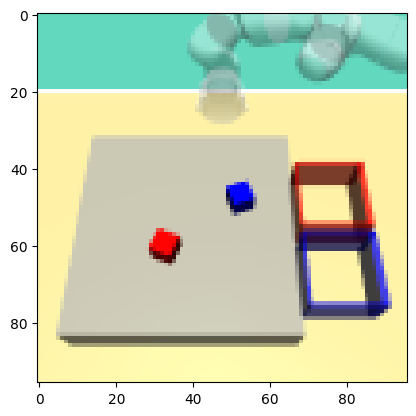

original obs  tensor([ 4.0825e-01,  1.1257e+00,  4.0950e-01,  6.8796e-01,  5.8071e-01,
        -1.4791e-01, -1.2038e-06,  1.8180e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  3.0422e-16,  4.6429e-16, -2.7069e+00])
obs  tensor([-0.3917,  3.9921, -0.3774,  2.3018,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.0068,  1.0000])
true action  tensor([-5.6636e-05,  8.3333e-03])
action type  delta


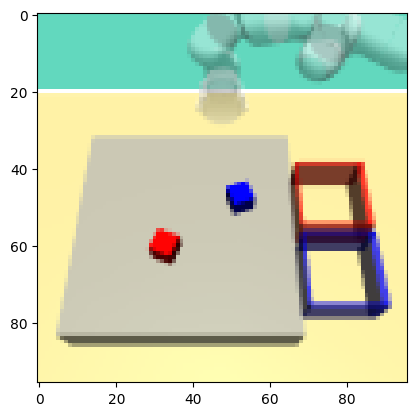

original obs  tensor([ 4.0819e-01,  1.1340e+00,  4.0944e-01,  6.8789e-01,  5.8071e-01,
        -1.4791e-01, -7.3946e-07,  1.1167e-06, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.6335e-16,  2.5723e-16, -2.7069e+00])
obs  tensor([-0.3920,  4.0212, -0.3776,  2.3016,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


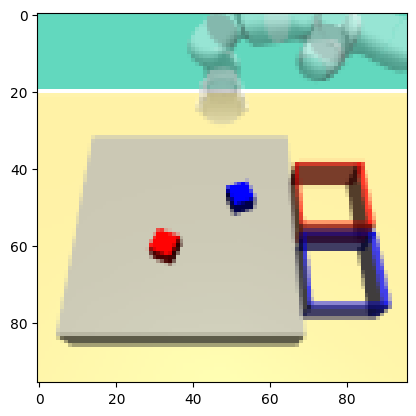

original obs  tensor([ 3.9986e-01,  1.1424e+00,  4.0895e-01,  6.8847e-01,  5.8071e-01,
        -1.4791e-01, -4.5389e-07,  6.8546e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.0153e-16,  1.5528e-16, -2.7069e+00])
obs  tensor([-0.4249,  4.0502, -0.3795,  2.3035,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9998, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


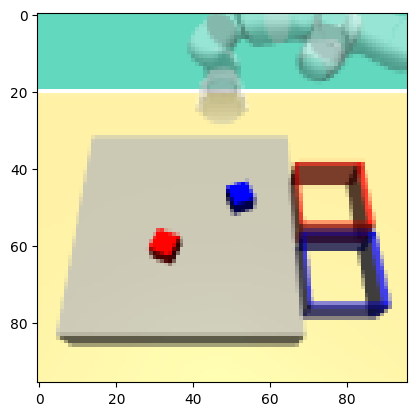

original obs  tensor([ 4.0819e-01,  1.1507e+00,  4.0756e-01,  6.8922e-01,  5.8071e-01,
        -1.4791e-01, -2.7859e-07,  4.2073e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  8.9665e-17,  1.0057e-16, -2.7069e+00])
obs  tensor([-0.3920,  4.0792, -0.3849,  2.3060,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


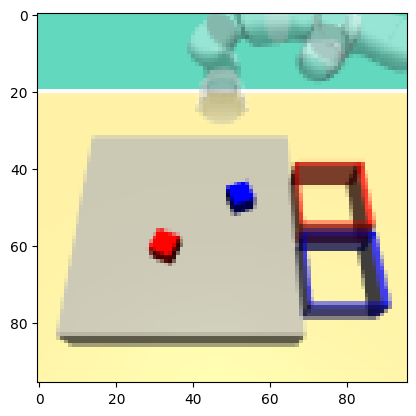

original obs  tensor([ 4.1653e-01,  1.1590e+00,  4.0624e-01,  6.9050e-01,  5.8071e-01,
        -1.4791e-01, -1.7100e-07,  2.5824e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  3.4058e-17,  7.1618e-17, -2.7069e+00])
obs  tensor([-0.3590,  4.1083, -0.3901,  2.3103,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9999,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


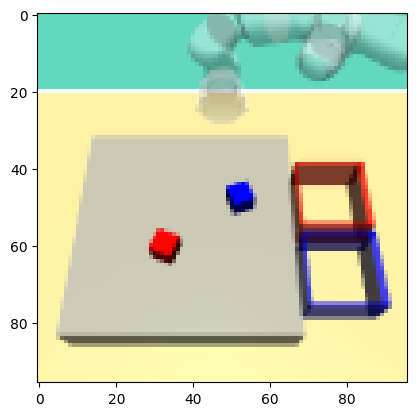

original obs  tensor([ 4.0819e-01,  1.1674e+00,  4.0555e-01,  6.9131e-01,  5.8071e-01,
        -1.4791e-01, -1.0495e-07,  1.5850e-07, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  3.6691e-17,  7.6057e-17, -2.7069e+00])
obs  tensor([-0.3920,  4.1373, -0.3927,  2.3129,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


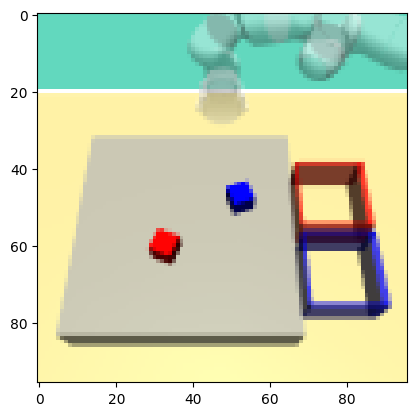

original obs  tensor([ 3.9986e-01,  1.1757e+00,  4.0472e-01,  6.9142e-01,  5.8071e-01,
        -1.4791e-01, -6.4420e-08,  9.7285e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -1.1714e-18,  5.2510e-17, -2.7069e+00])
obs  tensor([-0.4249,  4.1663, -0.3959,  2.3133,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


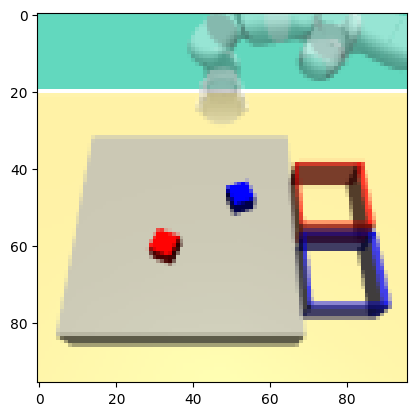

original obs  tensor([ 3.9153e-01,  1.1840e+00,  4.0328e-01,  6.9190e-01,  5.8071e-01,
        -1.4791e-01, -3.9540e-08,  5.9712e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.6093e-17,  3.9252e-17, -2.7069e+00])
obs  tensor([-0.4578,  4.1954, -0.4015,  2.3149,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.2088,  1.0000])
true action  tensor([-0.0017,  0.0083])
action type  delta


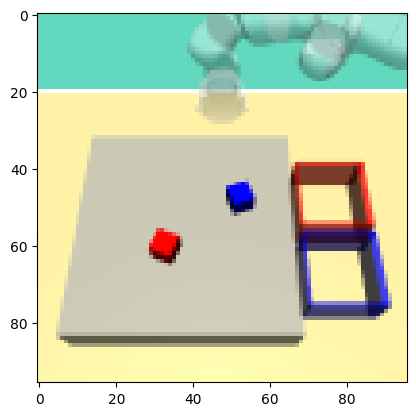

original obs  tensor([ 3.8979e-01,  1.1924e+00,  4.0091e-01,  6.9303e-01,  5.8071e-01,
        -1.4791e-01, -2.4269e-08,  3.6650e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.9040e-17,  2.6672e-17, -2.7069e+00])
obs  tensor([-0.4647,  4.2244, -0.4107,  2.3187,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9991, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


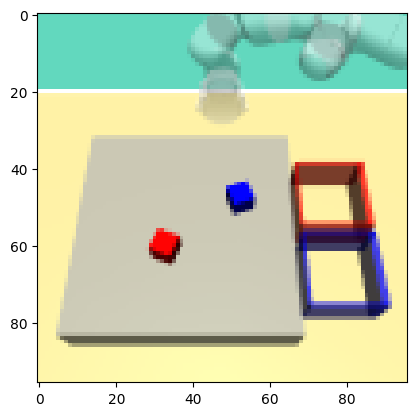

original obs  tensor([ 3.9811e-01,  1.2007e+00,  3.9784e-01,  6.9483e-01,  5.8071e-01,
        -1.4791e-01, -1.4896e-08,  2.2495e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02, -2.2098e-17,  1.1276e-17, -2.7069e+00])
obs  tensor([-0.4318,  4.2535, -0.4226,  2.3247,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9844, 1.0000])
true action  tensor([0.0082, 0.0083])
action type  delta


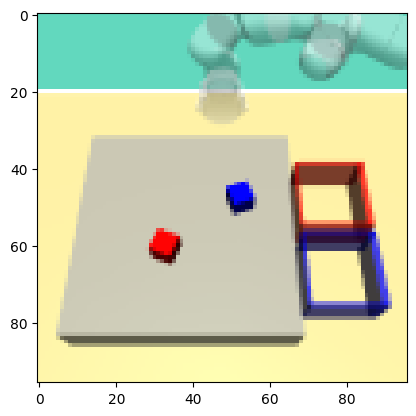

original obs  tensor([ 4.0631e-01,  1.2090e+00,  3.9499e-01,  6.9681e-01,  5.8071e-01,
        -1.4791e-01, -9.1428e-09,  1.3807e-08, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  4.7952e-07, -1.1603e-06, -2.7069e+00])
obs  tensor([-0.3994,  4.2825, -0.4337,  2.3313,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.4025,  1.0000])
true action  tensor([-0.0034,  0.0083])
action type  delta


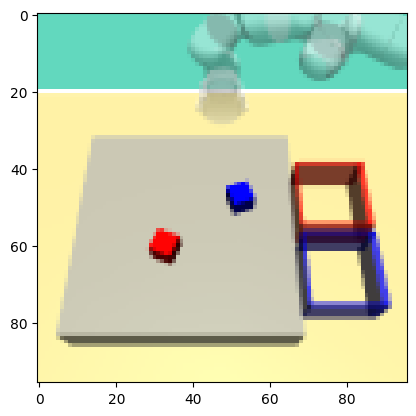

original obs  tensor([ 4.0296e-01,  1.2174e+00,  3.9297e-01,  6.9817e-01,  5.8071e-01,
        -1.4791e-01, -5.6117e-09,  8.4747e-09, -4.1218e-01,  4.3513e-01,
         4.9210e-02,  1.9194e-06, -4.6444e-06, -2.7069e+00])
obs  tensor([-0.4126,  4.3115, -0.4415,  2.3358,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.5672,  1.0000])
true action  tensor([-0.0047,  0.0083])
action type  delta


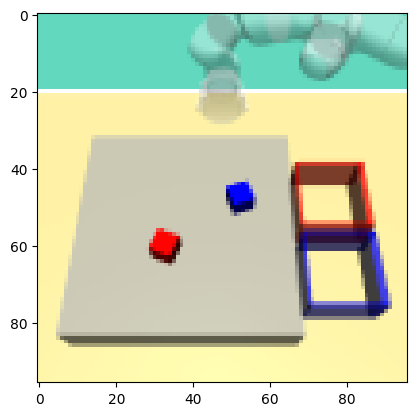

original obs  tensor([ 3.9823e-01,  1.2257e+00,  3.9137e-01,  6.9874e-01,  5.8071e-01,
        -1.4791e-01, -3.4444e-09,  5.2016e-09, -4.1218e-01,  4.3513e-01,
         4.9210e-02,  1.2427e-06, -3.0070e-06, -2.7069e+00])
obs  tensor([-0.4313,  4.3406, -0.4478,  2.3377,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


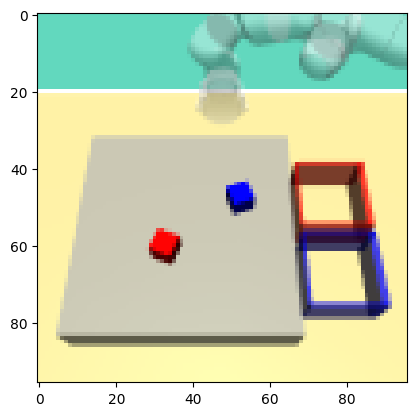

original obs  tensor([ 3.8990e-01,  1.2340e+00,  3.8986e-01,  6.9922e-01,  5.8071e-01,
        -1.4791e-01, -2.1141e-09,  3.1927e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  7.6532e-07, -1.8519e-06, -2.7069e+00])
obs  tensor([-0.4643,  4.3696, -0.4536,  2.3393,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


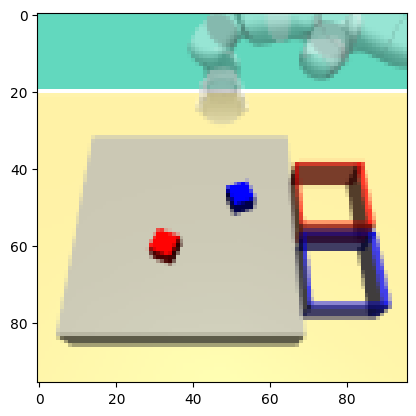

original obs  tensor([ 3.8157e-01,  1.2424e+00,  3.8795e-01,  6.9988e-01,  5.8071e-01,
        -1.4791e-01, -1.2976e-09,  1.9596e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  4.6984e-07, -1.1369e-06, -2.7069e+00])
obs  tensor([-0.4972,  4.3986, -0.4610,  2.3415,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9971,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


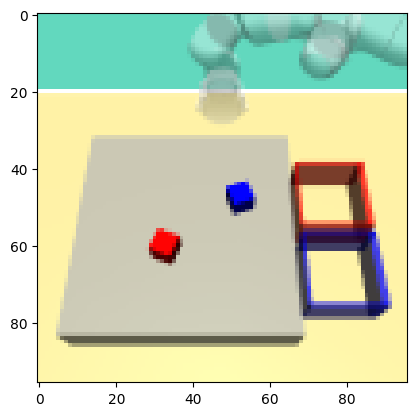

original obs  tensor([ 3.7326e-01,  1.2507e+00,  3.8532e-01,  7.0103e-01,  5.8071e-01,
        -1.4791e-01, -7.9645e-10,  1.2028e-09, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.8839e-07, -6.9782e-07, -2.7069e+00])
obs  tensor([-0.5300,  4.4277, -0.4712,  2.3453,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9123,  1.0000])
true action  tensor([-0.0076,  0.0083])
action type  delta


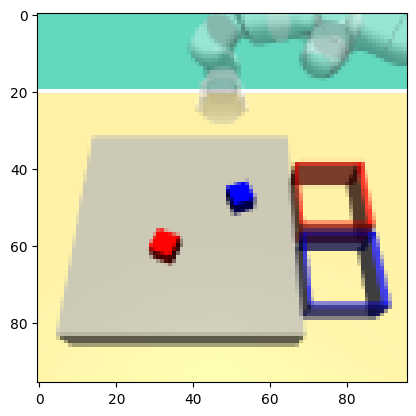

original obs  tensor([ 3.6565e-01,  1.2590e+00,  3.8177e-01,  7.0274e-01,  5.8071e-01,
        -1.4791e-01, -4.8885e-10,  7.3825e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.7701e-07, -4.2831e-07, -2.7069e+00])
obs  tensor([-0.5601,  4.4567, -0.4850,  2.3510,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


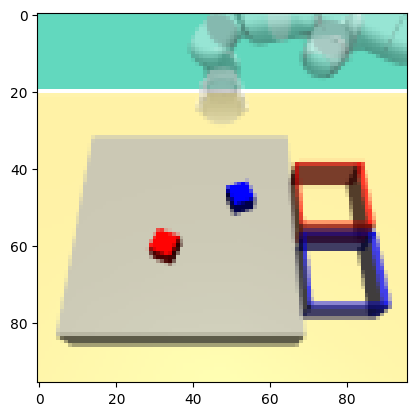

original obs  tensor([ 3.5732e-01,  1.2674e+00,  3.7722e-01,  7.0502e-01,  5.8071e-01,
        -1.4791e-01, -3.0005e-10,  4.5313e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.0864e-07, -2.6289e-07, -2.7069e+00])
obs  tensor([-0.5930,  4.4858, -0.5027,  2.3586,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


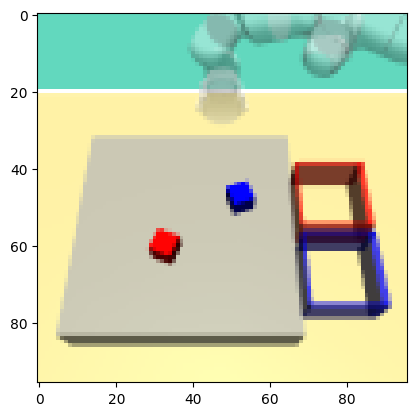

original obs  tensor([ 3.4899e-01,  1.2757e+00,  3.7164e-01,  7.0781e-01,  5.8071e-01,
        -1.4791e-01, -1.8416e-10,  2.7812e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  6.6684e-08, -1.6136e-07, -2.7069e+00])
obs  tensor([-0.6259,  4.5148, -0.5243,  2.3679,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.0000,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


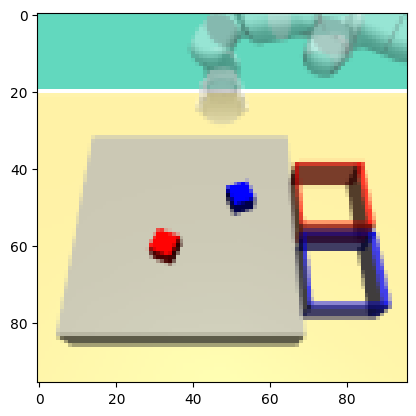

original obs  tensor([ 3.4065e-01,  1.2840e+00,  3.6499e-01,  7.1110e-01,  5.8071e-01,
        -1.4791e-01, -1.1304e-10,  1.7071e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  4.0930e-08, -9.9039e-08, -2.7069e+00])
obs  tensor([-0.6589,  4.5438, -0.5501,  2.3789,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


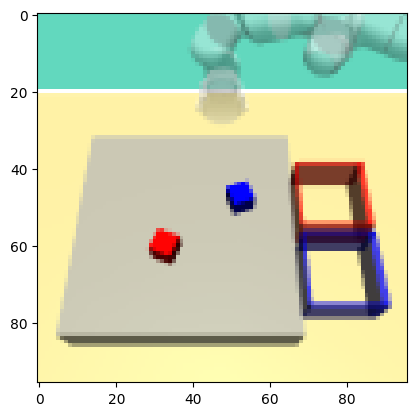

original obs  tensor([ 3.4899e-01,  1.2924e+00,  3.5733e-01,  7.1484e-01,  5.8071e-01,
        -1.4791e-01, -6.9380e-11,  1.0478e-10, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.5122e-08, -6.0789e-08, -2.7069e+00])
obs  tensor([-0.6259,  4.5729, -0.5799,  2.3914,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


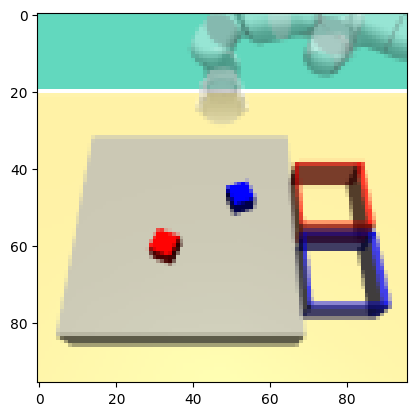

original obs  tensor([ 3.5732e-01,  1.3007e+00,  3.4983e-01,  7.1889e-01,  5.8071e-01,
        -1.4791e-01, -4.2584e-11,  6.4310e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.5419e-08, -3.7311e-08, -2.7069e+00])
obs  tensor([-0.5930,  4.6019, -0.6090,  2.4049,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1., 1.])
true action  tensor([0.0083, 0.0083])
action type  delta


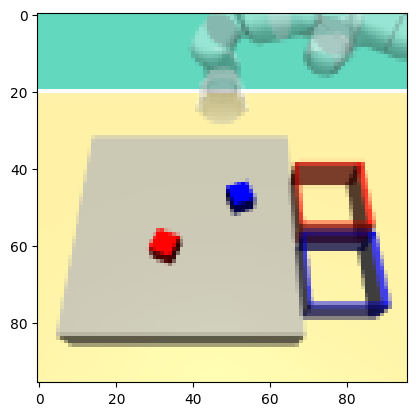

original obs  tensor([ 3.6565e-01,  1.3090e+00,  3.4340e-01,  7.2225e-01,  5.8071e-01,
        -1.4791e-01, -2.6138e-11,  3.9473e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  9.4642e-09, -2.2901e-08, -2.7069e+00])
obs  tensor([-0.5601,  4.6310, -0.6339,  2.4160,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


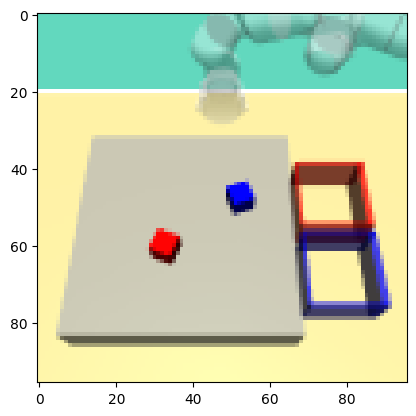

original obs  tensor([ 3.5732e-01,  1.3174e+00,  3.3867e-01,  7.2463e-01,  5.8071e-01,
        -1.4791e-01, -1.6043e-11,  2.4228e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  5.8090e-09, -1.4056e-08, -2.7069e+00])
obs  tensor([-0.5930,  4.6600, -0.6523,  2.4240,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.7932, 1.0000])
true action  tensor([0.0066, 0.0083])
action type  delta


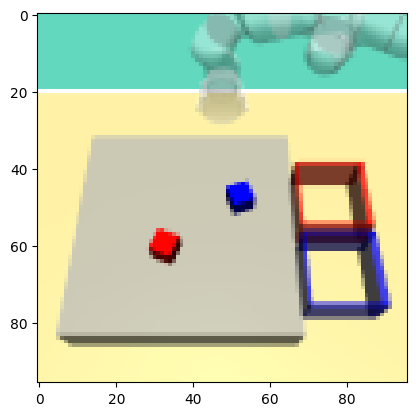

original obs  tensor([ 3.6393e-01,  1.3257e+00,  3.3490e-01,  7.2598e-01,  5.8071e-01,
        -1.4791e-01, -9.8469e-12,  1.4871e-11, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  3.5655e-09, -8.6275e-09, -2.7069e+00])
obs  tensor([-0.5669,  4.6890, -0.6669,  2.4285,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-1.,  1.])
true action  tensor([-0.0083,  0.0083])
action type  delta


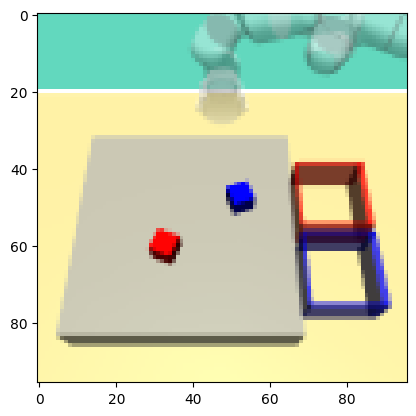

original obs  tensor([ 3.5560e-01,  1.3340e+00,  3.3253e-01,  7.2720e-01,  5.8071e-01,
        -1.4791e-01, -6.0439e-12,  9.1273e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  2.1884e-09, -5.2954e-09, -2.7069e+00])
obs  tensor([-0.5998,  4.7181, -0.6761,  2.4325,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([1.0000, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


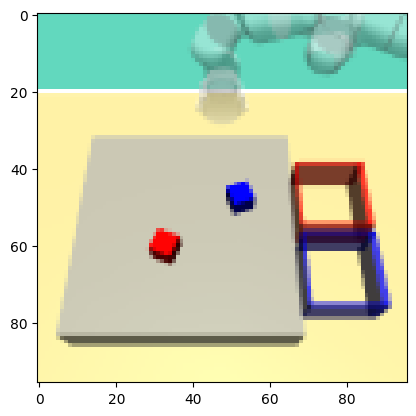

original obs  tensor([ 3.6393e-01,  1.3424e+00,  3.3088e-01,  7.2769e-01,  5.8071e-01,
        -1.4791e-01, -3.7097e-12,  5.6022e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  1.3432e-09, -3.2503e-09, -2.7069e+00])
obs  tensor([-0.5669,  4.7471, -0.6825,  2.4342,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([0.9971, 1.0000])
true action  tensor([0.0083, 0.0083])
action type  delta


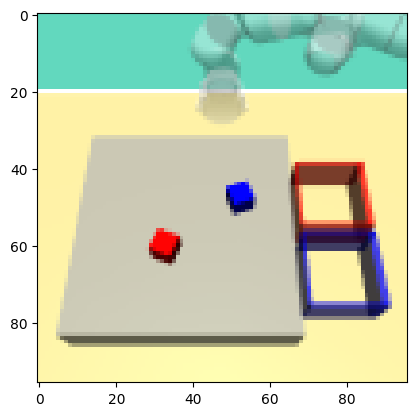

original obs  tensor([ 3.7224e-01,  1.3507e+00,  3.3053e-01,  7.2813e-01,  5.8071e-01,
        -1.4791e-01, -2.2769e-12,  3.4386e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  8.2445e-10, -1.9950e-09, -2.7069e+00])
obs  tensor([-0.5340,  4.7761, -0.6839,  2.4357,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.0990,  1.0000])
true action  tensor([-0.0008,  0.0083])
action type  delta


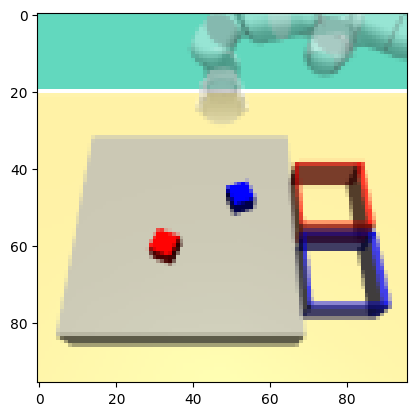

original obs  tensor([ 3.7141e-01,  1.3590e+00,  3.3194e-01,  7.2777e-01,  5.8071e-01,
        -1.4791e-01, -1.3975e-12,  2.1105e-12, -4.1218e-01,  4.3513e-01,
         4.9211e-02,  5.0603e-10, -1.2245e-09, -2.7069e+00])
obs  tensor([-0.5373,  4.8052, -0.6784,  2.4345,  0.4720, -0.8858,  0.4485,  0.8365,
         0.0000, -0.4965, -0.1830, -0.1379, -0.9434,  0.0000])
mpc  False
original action  tensor([-0.9999,  1.0000])
true action  tensor([-0.0083,  0.0083])
action type  delta


In [6]:
%env MUJOCO_GL=egl
%env MUJOCO_GL_DEBUG=1
import matplotlib.pyplot as plt
task_idx = 0

#TODO: add normalization
obs, done, ep_reward, t = env.reset(task_idx=task_idx), False, 0, 0
plt.imshow(env.render())
plt.show()
while not done:
    print("original obs ", obs)
    obs = normalize_obs(obs_min_val, obs_max_val, obs)
    print("obs ", obs)
    action = agent.act(obs, t0=t==0, task=task_idx)
    print("original action ", action)
    action = unnormalize_action(action_min_val, action_max_val, action)
    print("true action ", action)
    obs, reward, done, info = env.step(action)
    ep_reward += reward
    t += 1
    if t == 200:
        break
    plt.imshow(env.render())
    plt.show()
    
    